In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("../input/store-transaction-data/Hackathon_Working_Data.csv")
df

,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
0,M1,N1,4,T375,225.0,1.0,225.0,225.0,BUTTER MARGR (4/94),BUTTER,SALTED,G C M M F,AMUL,AMUL
1,M1,N1,4,T379,95.0,1.0,95.0,95.0,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,PARLE PRODS,MELODY,MELODY CHOCOLATY
2,M1,N1,4,T381,10.0,1.0,10.0,10.0,CHOCOLATE,CHOCOLATE PANNED,CHOCOLATE PANNED,MONDELEZ INTERNATIONAL,CADBURY SHOTS,CADBURY SHOTS
3,M1,N1,4,T382,108.0,1.0,108.0,108.0,PACKAGED TEA,MAIN PACKS,MAIN PACKS,GUJ TEA PROCESSORS,WAGH BAKRI,WAGH BAKRI INSTANT
4,M1,N1,4,T384,19.0,1.0,19.0,19.0,ALL IODISED SALT,POWDERED SALT,POWDERED SALT,TATA CHEM,TATA,TATA SALT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26980,M3,N10,31,T5999,10.0,1.0,10.0,10.0,BISCUITS - CORE & NON CORE,NON-SALT CRACKER,NON-SALT CRACKER,PARLE PRODS,PARLE KRACK JACK,PARLE KRACK JACK
26981,M3,N10,31,T6007,88.0,1.0,10.0,10.0,BISCUITS - CORE & NON CORE,MARIE,MARIE,PARLE PRODS,PARLE MARIE,PARLE MARIE
26982,M3,N10,31,T6007,88.0,2.0,20.0,10.0,BISCUITS - CORE & NON CORE,GLUCOSE,GLUCOSE,PARLE PRODS,PARLE-G,PARLE-G
26983,M3,N10,31,T6007,88.0,1.0,58.0,58.0,CLEANERS - GLASS,LIQUIDS,LIQUIDS,RECKITT BENCKISER,COLIN,COLIN


The dataset contains information regarding the sales of ten different stores during a period of three months. Our objective is to discover the particular characteristics of each store's sales and possibly determine strategies to implement based on our findings.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26985 entries, 0 to 26984
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MONTH      26985 non-null  object 
 1   STORECODE  26985 non-null  object 
 2   DAY        26985 non-null  int64  
 3   BILL_ID    26985 non-null  object 
 4   BILL_AMT   26985 non-null  float64
 5   QTY        26985 non-null  float64
 6   VALUE      26985 non-null  float64
 7   PRICE      26985 non-null  float64
 8   GRP        26985 non-null  object 
 9   SGRP       26985 non-null  object 
 10  SSGRP      26985 non-null  object 
 11  CMP        26985 non-null  object 
 12  MBRD       26985 non-null  object 
 13  BRD        26985 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 2.9+ MB


## Sales by Store Analysis

In the dataset we can see that each transaction has its own Bill_Id number. However, some of them are used by more than one store. In order to avoid miscalculations we'll create a unique Id by combining the Bill_Id with the Storecode number in a new column in order to calculate sales accurately.

In [4]:
df['UNIQUE_ID'] = df['STORECODE'].str.cat(df['BILL_ID'],sep="_")
df

,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD,UNIQUE_ID
0,M1,N1,4,T375,225.0,1.0,225.0,225.0,BUTTER MARGR (4/94),BUTTER,SALTED,G C M M F,AMUL,AMUL,N1_T375
1,M1,N1,4,T379,95.0,1.0,95.0,95.0,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,PARLE PRODS,MELODY,MELODY CHOCOLATY,N1_T379
2,M1,N1,4,T381,10.0,1.0,10.0,10.0,CHOCOLATE,CHOCOLATE PANNED,CHOCOLATE PANNED,MONDELEZ INTERNATIONAL,CADBURY SHOTS,CADBURY SHOTS,N1_T381
3,M1,N1,4,T382,108.0,1.0,108.0,108.0,PACKAGED TEA,MAIN PACKS,MAIN PACKS,GUJ TEA PROCESSORS,WAGH BAKRI,WAGH BAKRI INSTANT,N1_T382
4,M1,N1,4,T384,19.0,1.0,19.0,19.0,ALL IODISED SALT,POWDERED SALT,POWDERED SALT,TATA CHEM,TATA,TATA SALT,N1_T384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26980,M3,N10,31,T5999,10.0,1.0,10.0,10.0,BISCUITS - CORE & NON CORE,NON-SALT CRACKER,NON-SALT CRACKER,PARLE PRODS,PARLE KRACK JACK,PARLE KRACK JACK,N10_T5999
26981,M3,N10,31,T6007,88.0,1.0,10.0,10.0,BISCUITS - CORE & NON CORE,MARIE,MARIE,PARLE PRODS,PARLE MARIE,PARLE MARIE,N10_T6007
26982,M3,N10,31,T6007,88.0,2.0,20.0,10.0,BISCUITS - CORE & NON CORE,GLUCOSE,GLUCOSE,PARLE PRODS,PARLE-G,PARLE-G,N10_T6007
26983,M3,N10,31,T6007,88.0,1.0,58.0,58.0,CLEANERS - GLASS,LIQUIDS,LIQUIDS,RECKITT BENCKISER,COLIN,COLIN,N10_T6007


In [5]:
by_store = df.groupby("UNIQUE_ID").mean()[["DAY","BILL_AMT","QTY"]]
by_store

,DAY,BILL_AMT,QTY
UNIQUE_ID,,,
N10_T1038,5,34.0,1.000000
N10_T1039,5,46.0,1.000000
N10_T1040,5,86.0,1.000000
N10_T1043,5,20.0,1.000000
N10_T1048,5,180.0,1.000000
...,...,...,...
N9_T940,2,200.0,1.000000
N9_T95,7,56.0,1.000000
N9_T953,3,1656.0,2.545455


In [6]:
merged_df = pd.merge(df,by_store,on="UNIQUE_ID")
merged_df

,MONTH,STORECODE,DAY_x,BILL_ID,BILL_AMT_x,QTY_x,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD,UNIQUE_ID,DAY_y,BILL_AMT_y,QTY_y
0,M1,N1,4,T375,225.0,1.0,225.0,225.0,BUTTER MARGR (4/94),BUTTER,SALTED,G C M M F,AMUL,AMUL,N1_T375,4,225.0,1.000000
1,M1,N1,4,T379,95.0,1.0,95.0,95.0,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,PARLE PRODS,MELODY,MELODY CHOCOLATY,N1_T379,4,95.0,1.000000
2,M1,N1,4,T381,10.0,1.0,10.0,10.0,CHOCOLATE,CHOCOLATE PANNED,CHOCOLATE PANNED,MONDELEZ INTERNATIONAL,CADBURY SHOTS,CADBURY SHOTS,N1_T381,4,10.0,1.000000
3,M1,N1,4,T382,108.0,1.0,108.0,108.0,PACKAGED TEA,MAIN PACKS,MAIN PACKS,GUJ TEA PROCESSORS,WAGH BAKRI,WAGH BAKRI INSTANT,N1_T382,4,108.0,1.000000
4,M1,N1,4,T384,19.0,1.0,19.0,19.0,ALL IODISED SALT,POWDERED SALT,POWDERED SALT,TATA CHEM,TATA,TATA SALT,N1_T384,4,19.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26980,M3,N10,31,T5999,10.0,1.0,10.0,10.0,BISCUITS - CORE & NON CORE,NON-SALT CRACKER,NON-SALT CRACKER,PARLE PRODS,PARLE KRACK JACK,PARLE KRACK JACK,N10_T5999,31,10.0,1.000000
26981,M3,N10,31,T6007,88.0,1.0,10.0,10.0,BISCUITS - CORE & NON CORE,MARIE,MARIE,PARLE PRODS,PARLE MARIE,PARLE MARIE,N10_T6007,31,88.0,1.333333
26982,M3,N10,31,T6007,88.0,2.0,20.0,10.0,BISCUITS - CORE & NON CORE,GLUCOSE,GLUCOSE,PARLE PRODS,PARLE-G,PARLE-G,N10_T6007,31,88.0,1.333333
26983,M3,N10,31,T6007,88.0,1.0,58.0,58.0,CLEANERS - GLASS,LIQUIDS,LIQUIDS,RECKITT BENCKISER,COLIN,COLIN,N10_T6007,31,88.0,1.333333


In [7]:
merged_df = merged_df.drop(["DAY_x","BILL_AMT_x"], axis=1)
merged_df

,MONTH,STORECODE,BILL_ID,QTY_x,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD,UNIQUE_ID,DAY_y,BILL_AMT_y,QTY_y
0,M1,N1,T375,1.0,225.0,225.0,BUTTER MARGR (4/94),BUTTER,SALTED,G C M M F,AMUL,AMUL,N1_T375,4,225.0,1.000000
1,M1,N1,T379,1.0,95.0,95.0,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,PARLE PRODS,MELODY,MELODY CHOCOLATY,N1_T379,4,95.0,1.000000
2,M1,N1,T381,1.0,10.0,10.0,CHOCOLATE,CHOCOLATE PANNED,CHOCOLATE PANNED,MONDELEZ INTERNATIONAL,CADBURY SHOTS,CADBURY SHOTS,N1_T381,4,10.0,1.000000
3,M1,N1,T382,1.0,108.0,108.0,PACKAGED TEA,MAIN PACKS,MAIN PACKS,GUJ TEA PROCESSORS,WAGH BAKRI,WAGH BAKRI INSTANT,N1_T382,4,108.0,1.000000
4,M1,N1,T384,1.0,19.0,19.0,ALL IODISED SALT,POWDERED SALT,POWDERED SALT,TATA CHEM,TATA,TATA SALT,N1_T384,4,19.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26980,M3,N10,T5999,1.0,10.0,10.0,BISCUITS - CORE & NON CORE,NON-SALT CRACKER,NON-SALT CRACKER,PARLE PRODS,PARLE KRACK JACK,PARLE KRACK JACK,N10_T5999,31,10.0,1.000000
26981,M3,N10,T6007,1.0,10.0,10.0,BISCUITS - CORE & NON CORE,MARIE,MARIE,PARLE PRODS,PARLE MARIE,PARLE MARIE,N10_T6007,31,88.0,1.333333
26982,M3,N10,T6007,2.0,20.0,10.0,BISCUITS - CORE & NON CORE,GLUCOSE,GLUCOSE,PARLE PRODS,PARLE-G,PARLE-G,N10_T6007,31,88.0,1.333333
26983,M3,N10,T6007,1.0,58.0,58.0,CLEANERS - GLASS,LIQUIDS,LIQUIDS,RECKITT BENCKISER,COLIN,COLIN,N10_T6007,31,88.0,1.333333


In [8]:
unique_sales = merged_df.groupby("UNIQUE_ID",as_index=True).mean()[["DAY_y","BILL_AMT_y"]]
unique_sales

,DAY_y,BILL_AMT_y
UNIQUE_ID,,
N10_T1038,5,34.0
N10_T1039,5,46.0
N10_T1040,5,86.0
N10_T1043,5,20.0
N10_T1048,5,180.0
...,...,...
N9_T940,2,200.0
N9_T95,7,56.0
N9_T953,3,1656.0


Let's start by finding out what are the total sales by store.

In [9]:
unique_sales['STORE'] = unique_sales.index.str.split('_').str[0]
unique_sales

,DAY_y,BILL_AMT_y,STORE
UNIQUE_ID,,,
N10_T1038,5,34.0,N10
N10_T1039,5,46.0,N10
N10_T1040,5,86.0,N10
N10_T1043,5,20.0,N10
N10_T1048,5,180.0,N10
...,...,...,...
N9_T940,2,200.0,N9
N9_T95,7,56.0,N9
N9_T953,3,1656.0,N9


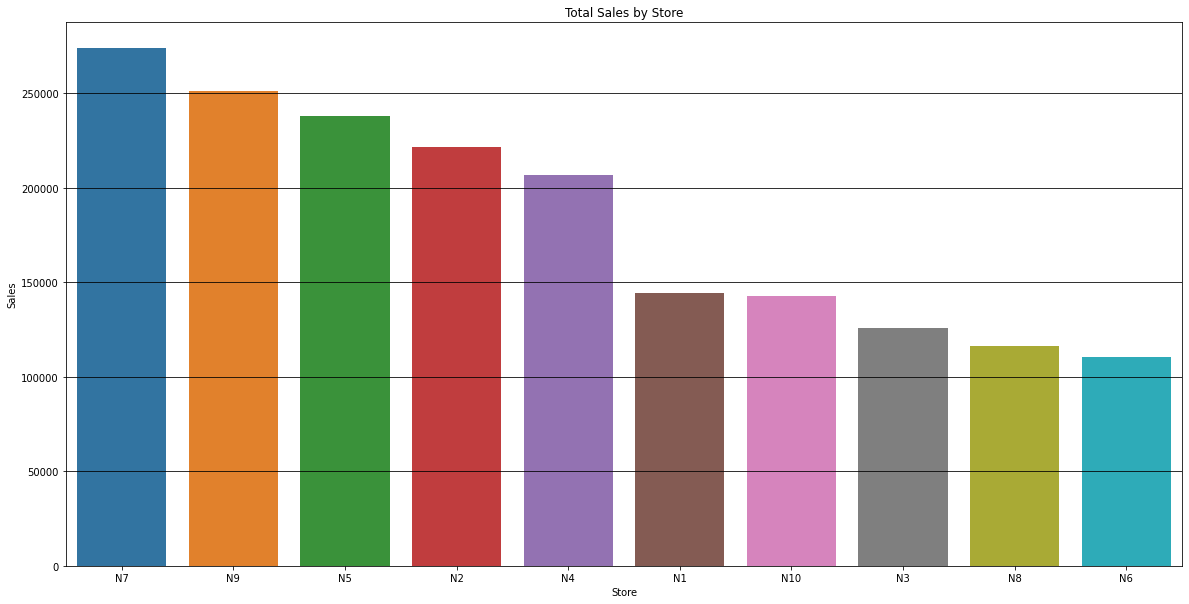

In [10]:
sales_by_store = unique_sales.groupby("STORE").sum().sort_values('BILL_AMT_y', ascending=False)
plt.figure(figsize=(20,10))
sns.barplot(x=sales_by_store.index,y=sales_by_store['BILL_AMT_y'],data=sales_by_store)
plt.title("Total Sales by Store")
plt.xlabel("Store")
plt.ylabel("Sales")
plt.grid(axis='y',color='black')

We can observe that stores 7, 9, 5, 2, and 4 are well above the rest in terms of total sales during the three month period. Let's now take a look at their variability and what are their daily sales each month in total and in average.

Text(0, 0.5, 'Sales')

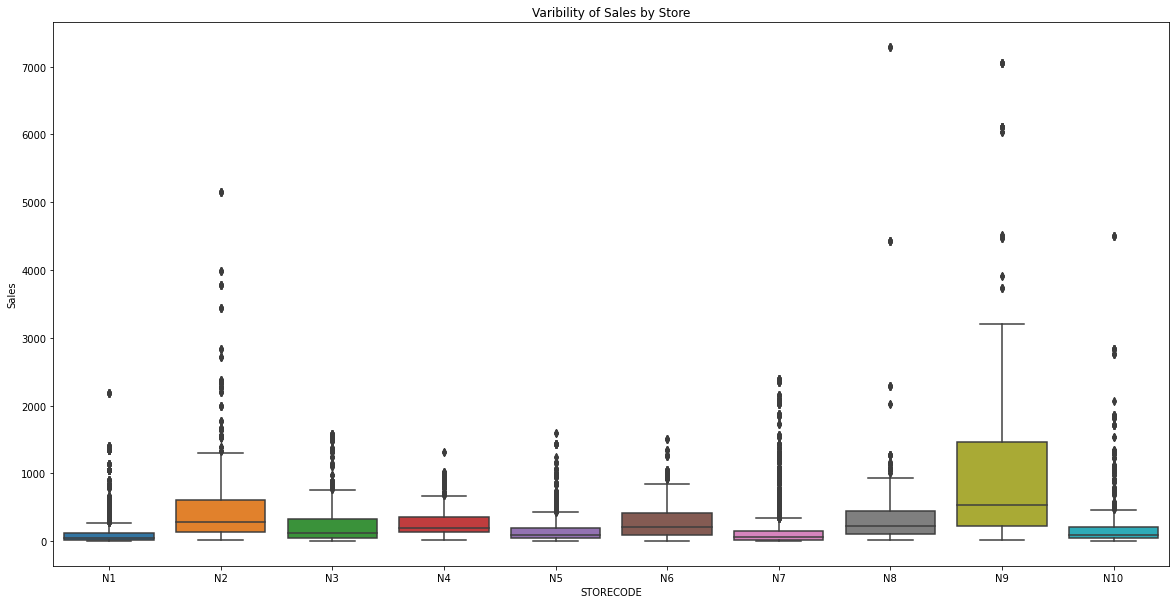

In [11]:
plt.figure(figsize=(20,10))
sns.boxplot(x=df["STORECODE"],y=df["BILL_AMT"],data=df)
plt.title("Varibility of Sales by Store")
plt.ylabel("Sales")

## What are the daily sales by Store?

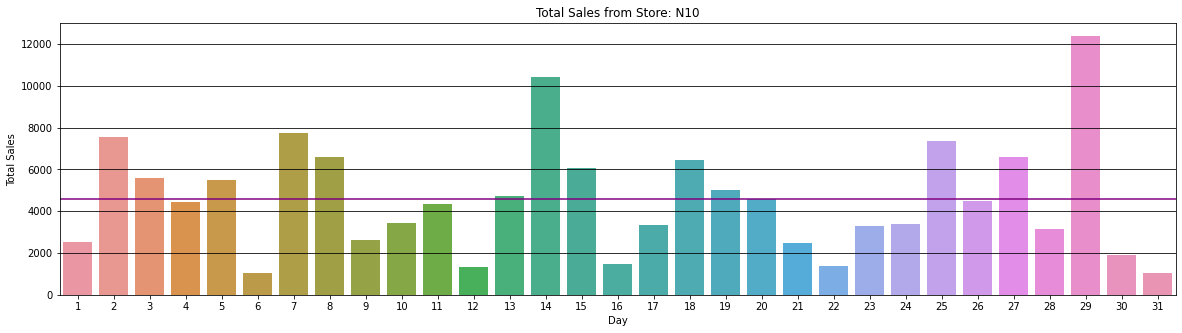

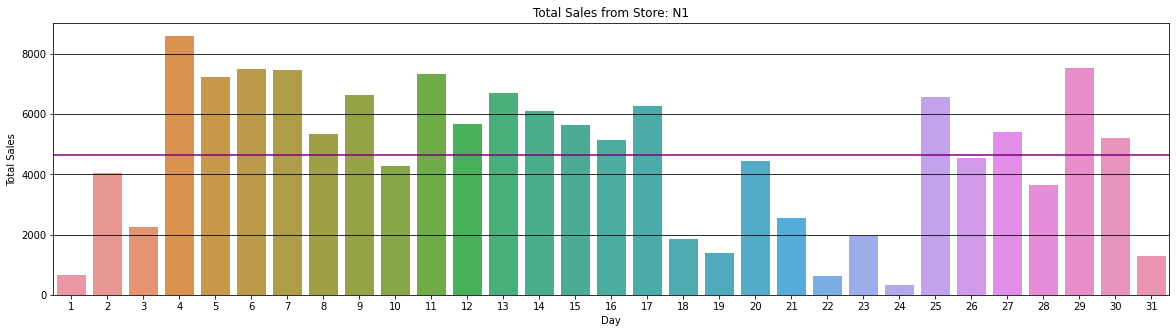

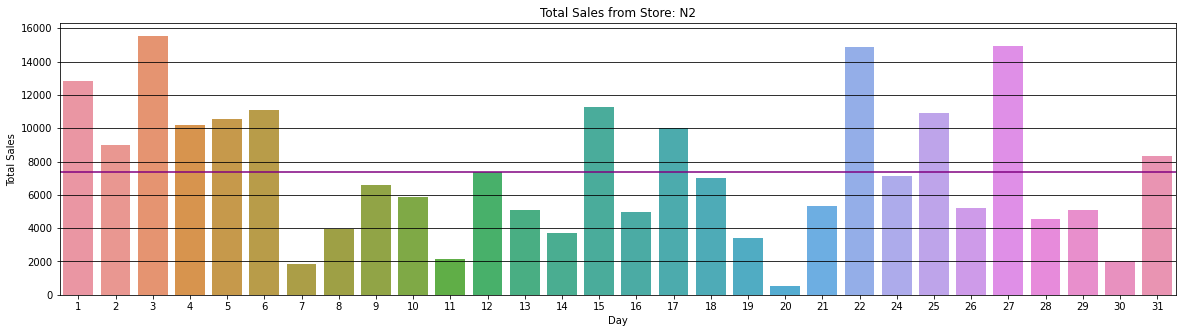

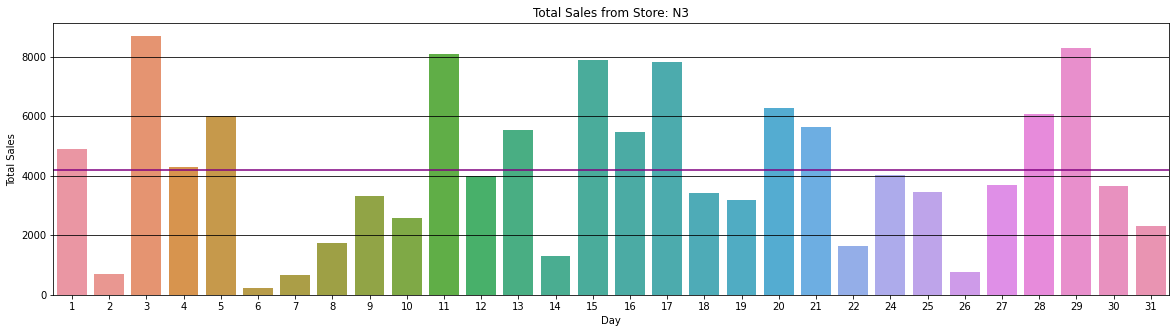

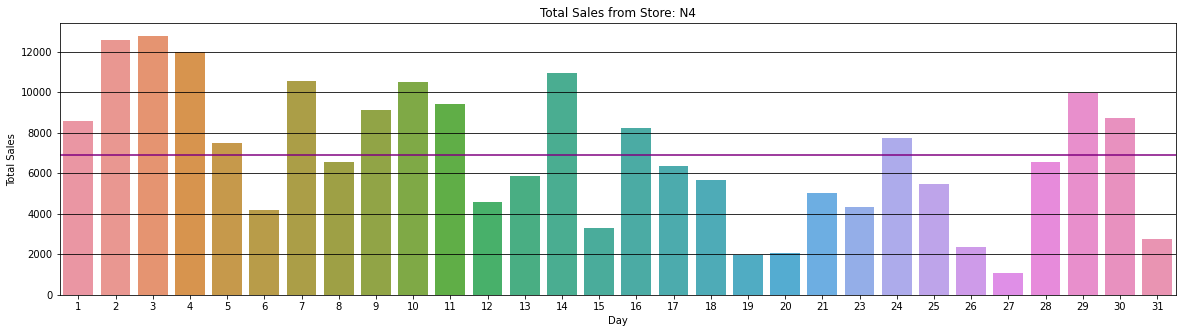

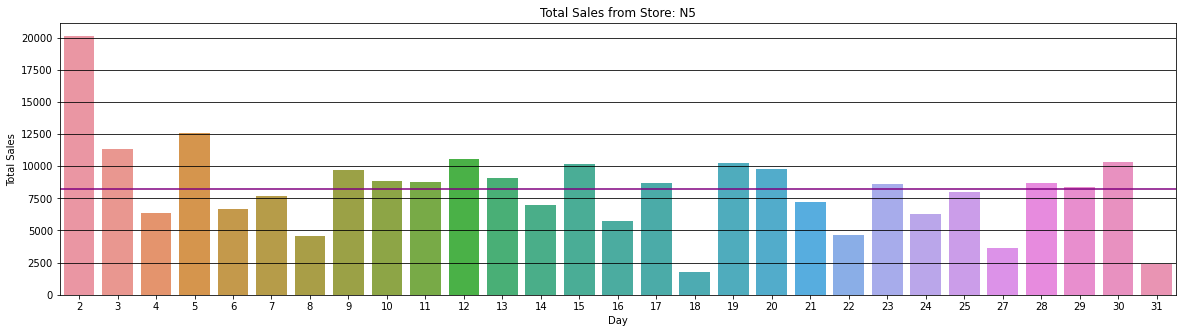

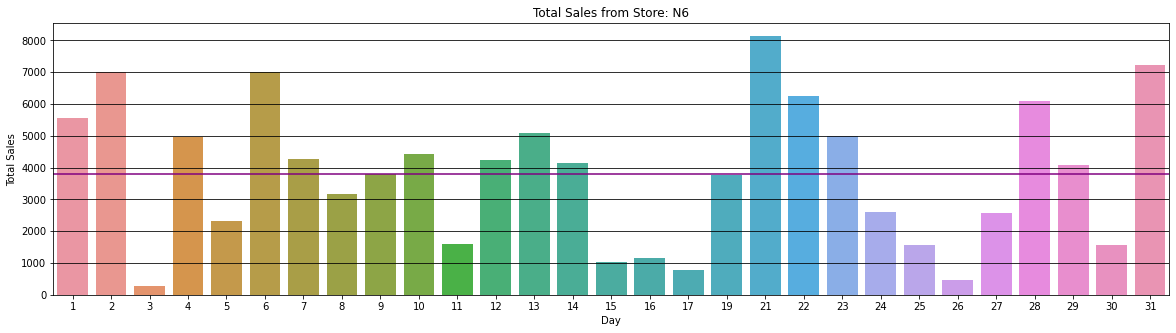

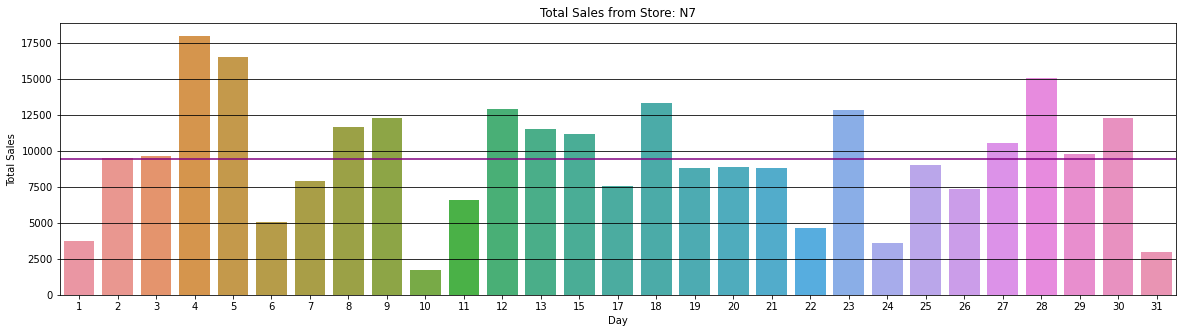

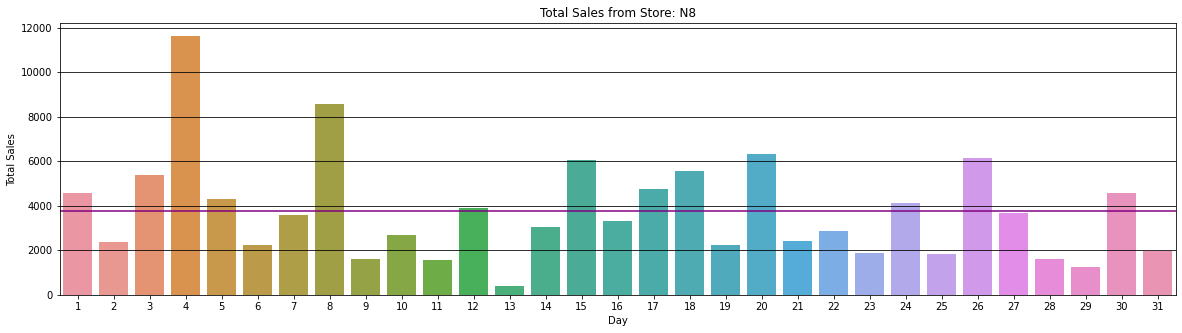

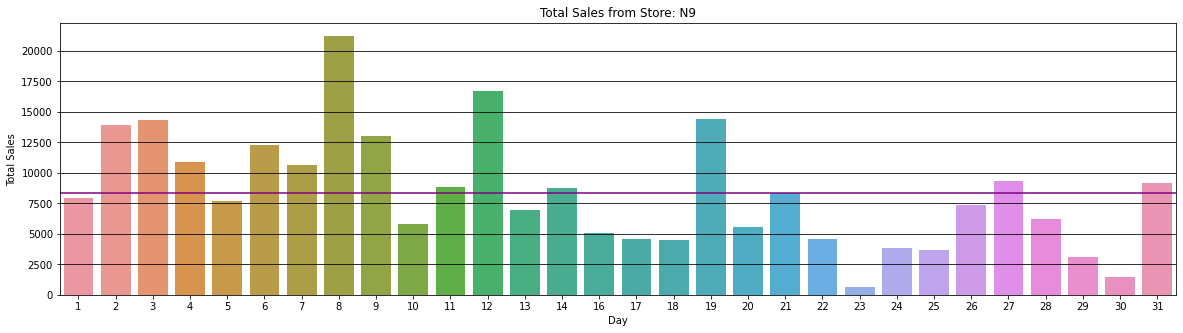

In [12]:
for i in unique_sales.STORE.unique():
    store = unique_sales.loc[unique_sales.STORE == i].groupby("DAY_y").sum()
    plt.figure(figsize=(20,5))
    sns.barplot(x=store.index,y=store["BILL_AMT_y"],data=store).axhline(store["BILL_AMT_y"].mean(),color='purple')
    plt.title("Total Sales from Store: " + i)
    plt.xlabel("Day")
    plt.ylabel("Total Sales")
    plt.grid(axis='y',color='black')

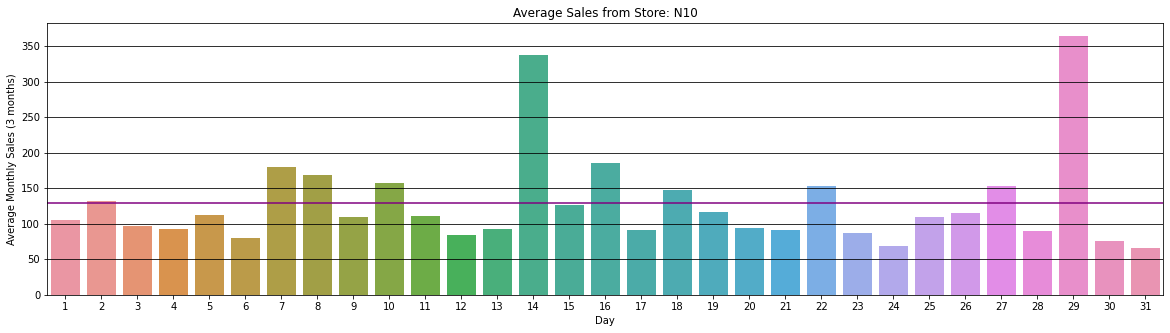

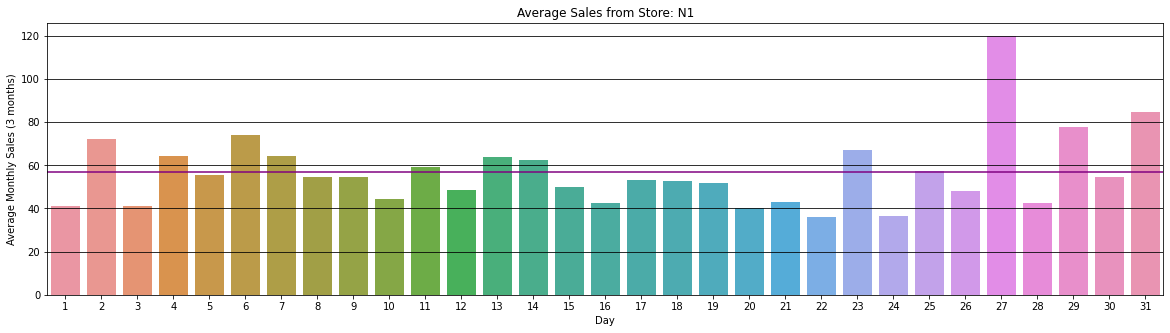

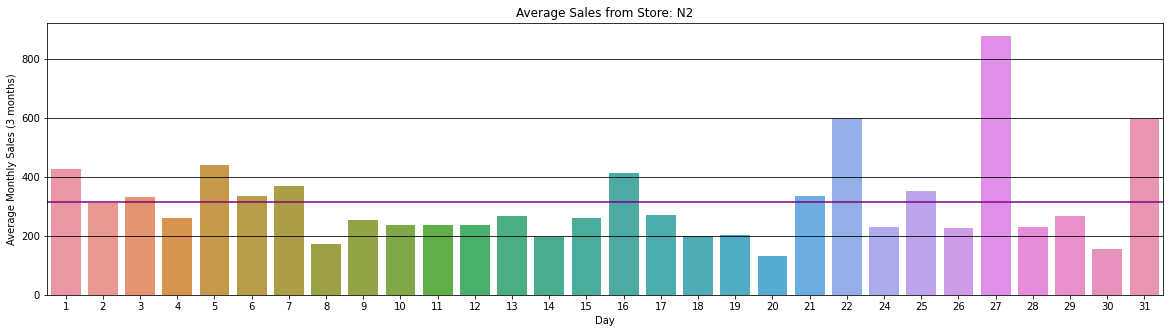

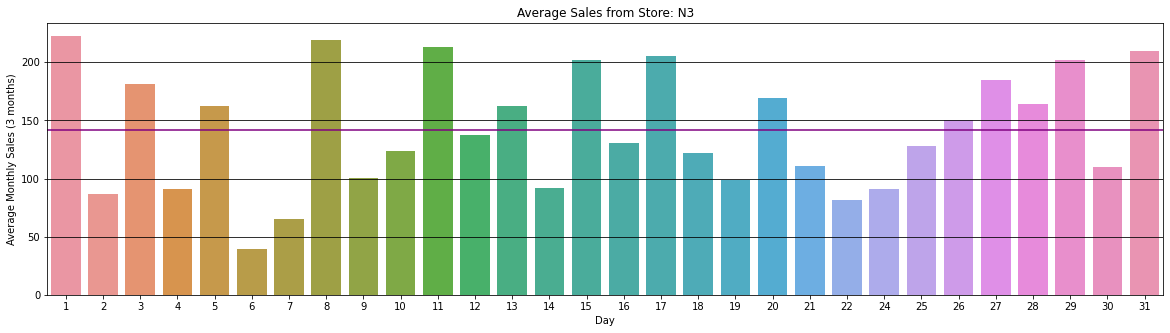

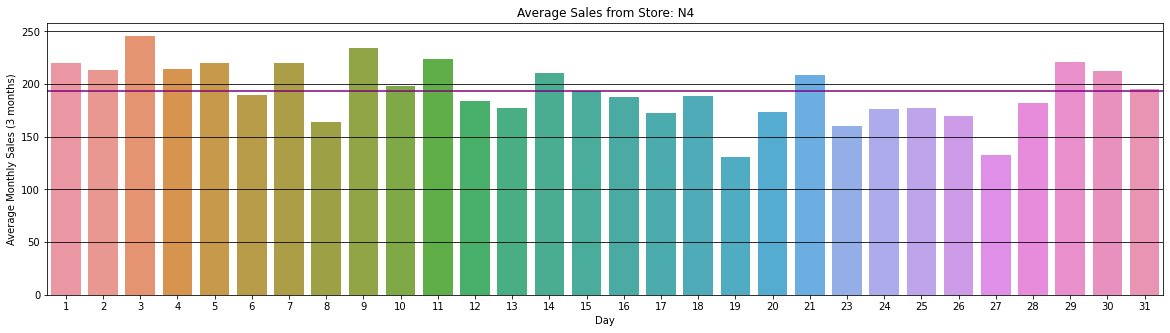

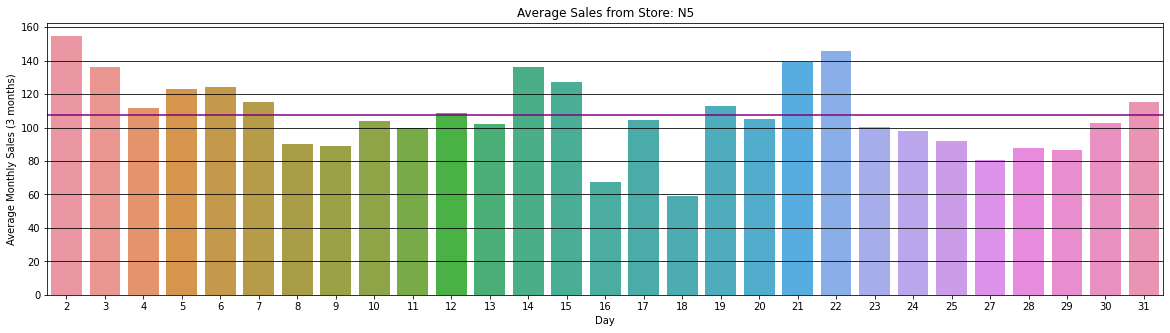

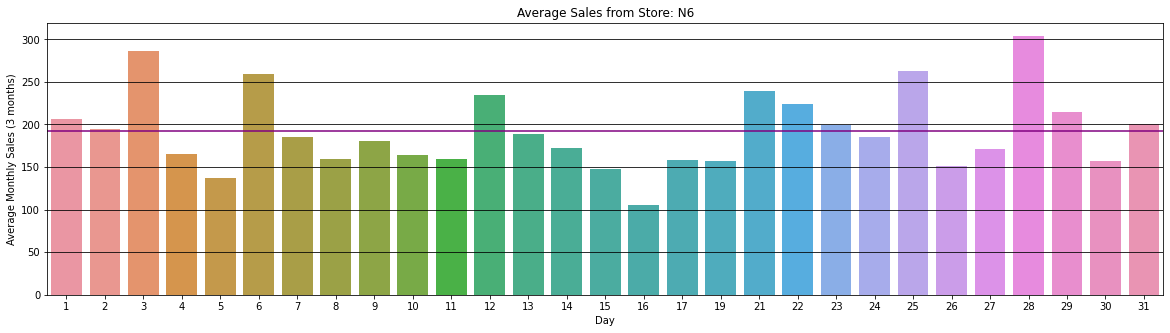

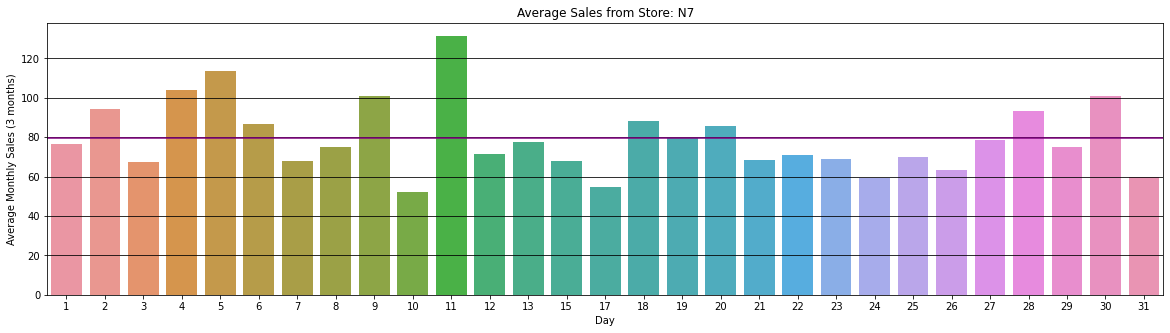

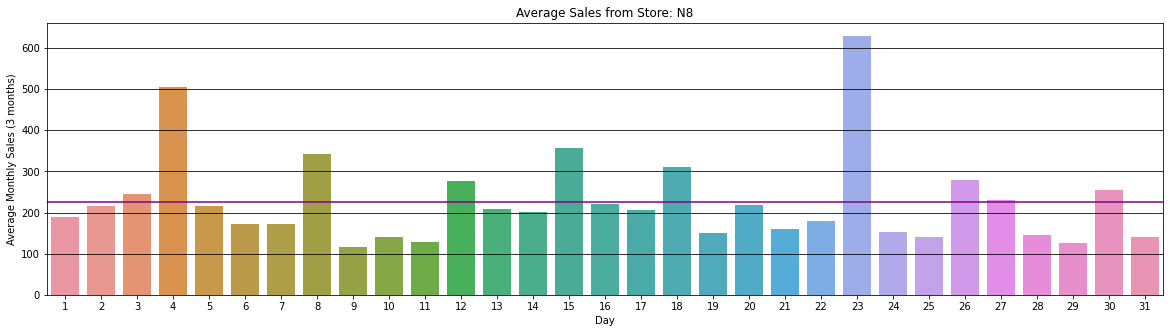

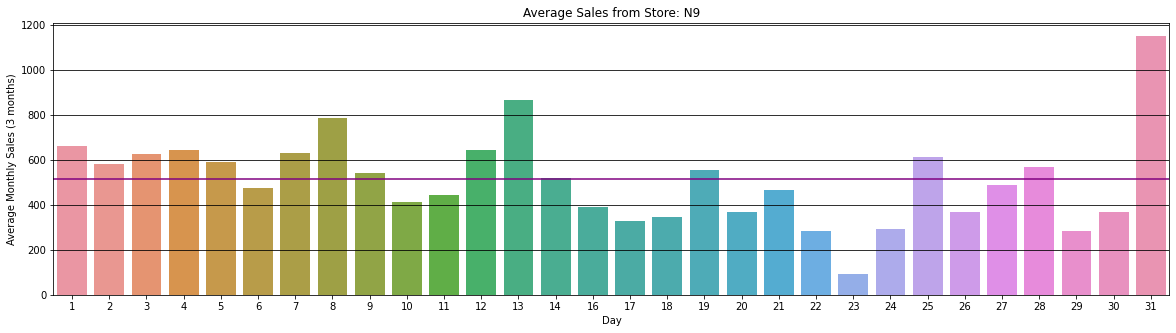

In [13]:
for i in unique_sales.STORE.unique():
    store = unique_sales.loc[unique_sales.STORE == i].groupby("DAY_y").mean()
    plt.figure(figsize=(20,5))
    sns.barplot(x=store.index,y=store["BILL_AMT_y"],data=store).axhline(store["BILL_AMT_y"].mean(),color='purple')
    plt.title("Average Sales from Store: " + i)
    plt.xlabel("Day")
    plt.ylabel("Average Monthly Sales (3 months)")
    plt.grid(axis='y',color='black')

The two sets of figures above are very revealing. The first one aggregates the sales of the thirty days of the month (three month aggregate). The second one takes an average of the daily sales during the entire month for the three month period. 

The first set confirms the fact that stores 7, 9, 5, 2, and 4 have the highest total sales. However, the second one tells us a different story. Stores 9, 8, 4, 6, and 2 have the highest average daily sales. This may suggest that the other stores possibly had a couple of days of good sales but have less consistency.

In order to have a better understanding of what could be happening, we need to take a deeper look into what's being sold at each store.

## Which category sells the most items in general and by store? 

We will begin by determining which product categories have the highest sales in general and at each store. 

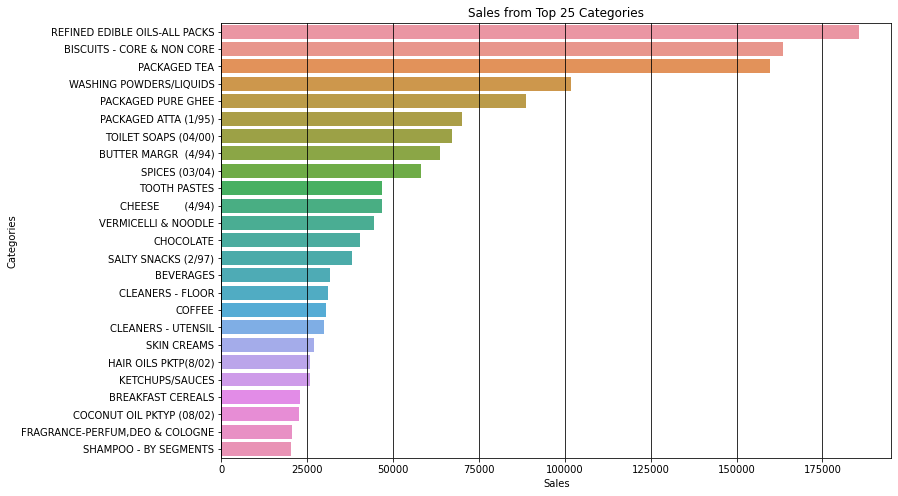

In [14]:
top_items_sales = merged_df.groupby('GRP').sum().sort_values("VALUE",ascending=False)[['QTY_x','PRICE','VALUE']][0:25]
plt.figure(figsize=(12,8))
sns.barplot(x='VALUE',y=top_items_sales.index,data=top_items_sales)
plt.title("Sales from Top 25 Categories")
plt.xlabel("Sales")
plt.ylabel("Categories")
plt.grid(axis='x',color='black');

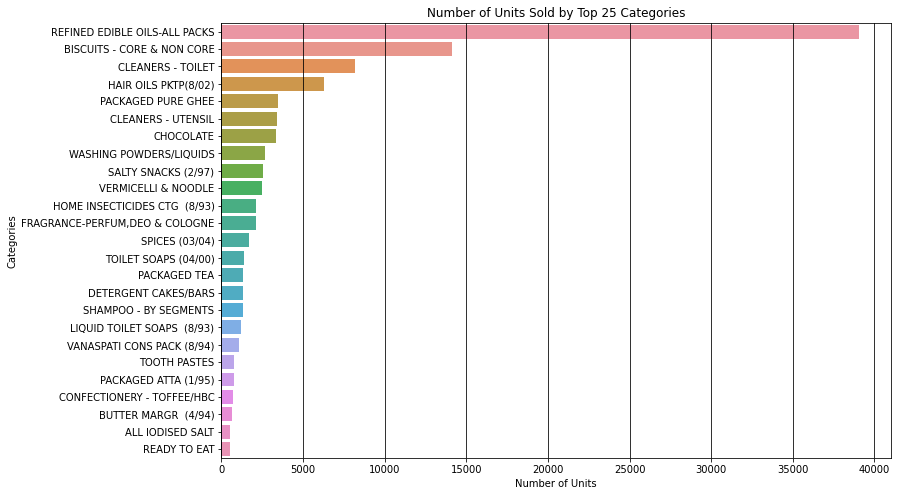

In [15]:
top_items = merged_df.groupby('GRP').sum().sort_values("QTY_x",ascending=False)[['QTY_x','PRICE']][0:25]
plt.figure(figsize=(12,8))
sns.barplot(x='QTY_x',y=top_items.index,data=top_items)
plt.title("Number of Units Sold by Top 25 Categories")
plt.xlabel("Number of Units")
plt.ylabel("Categories")
plt.grid(axis='x',color='black');

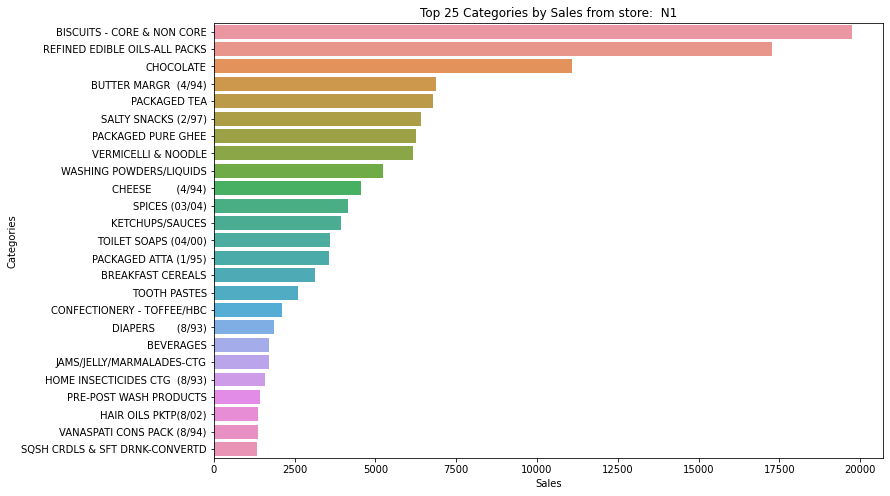

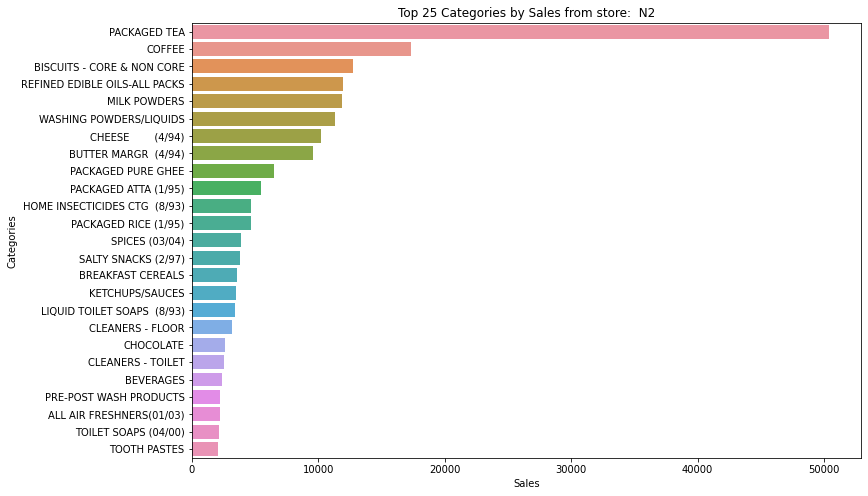

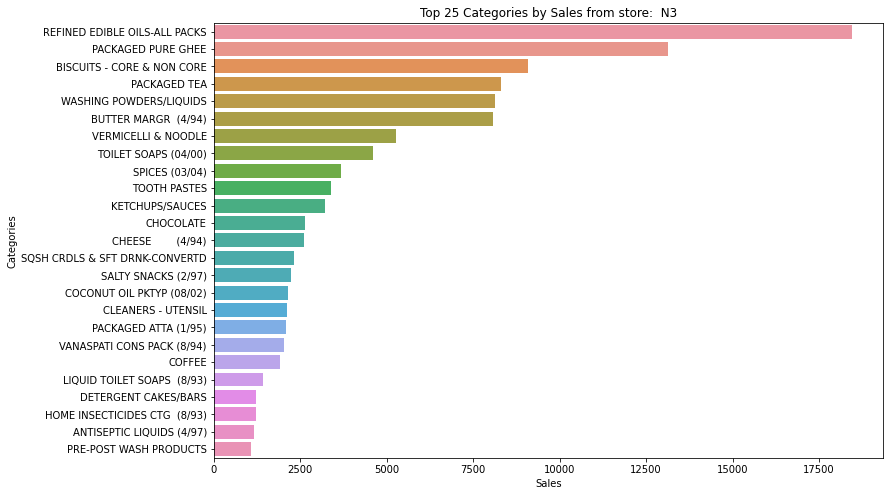

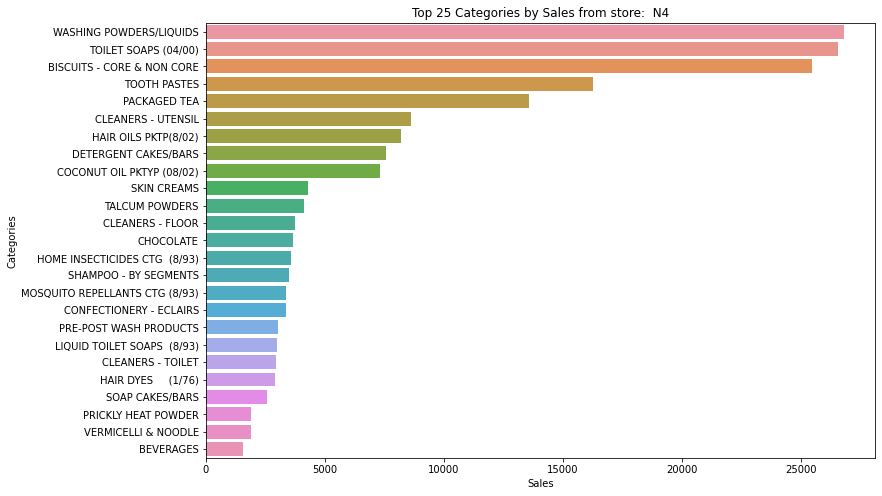

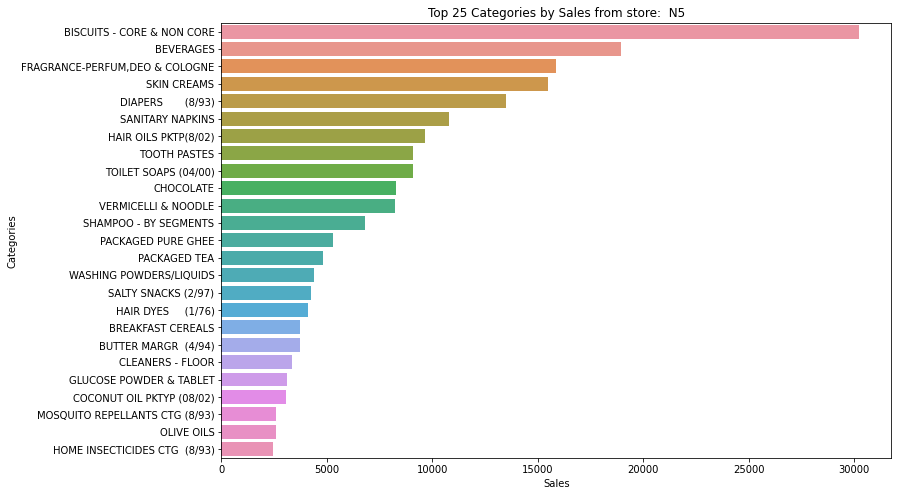

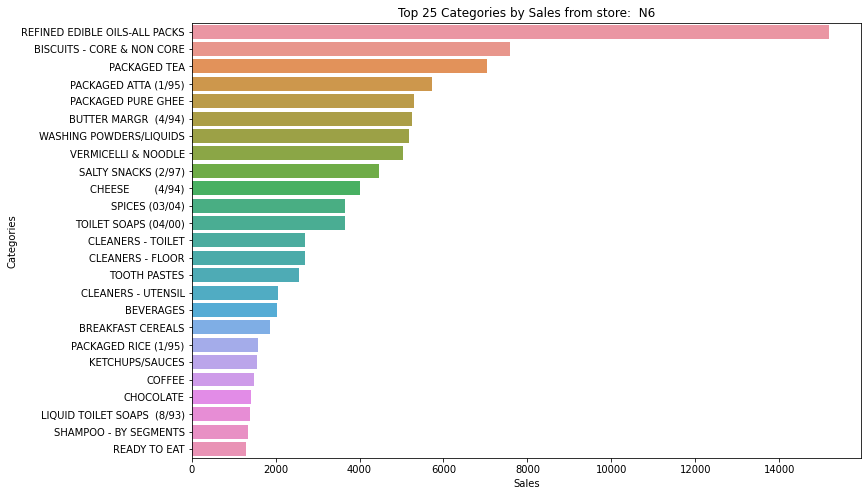

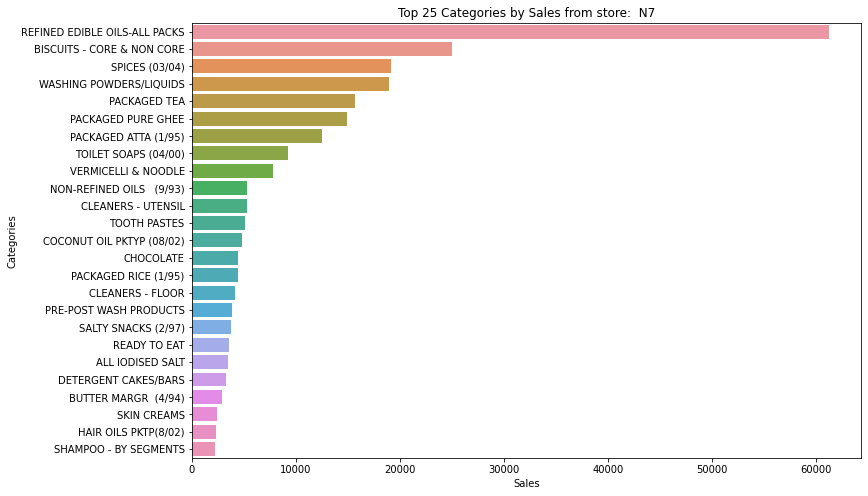

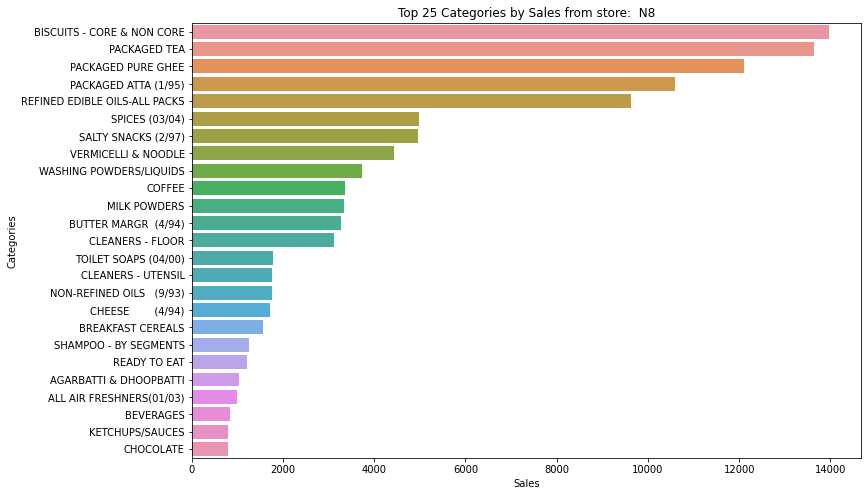

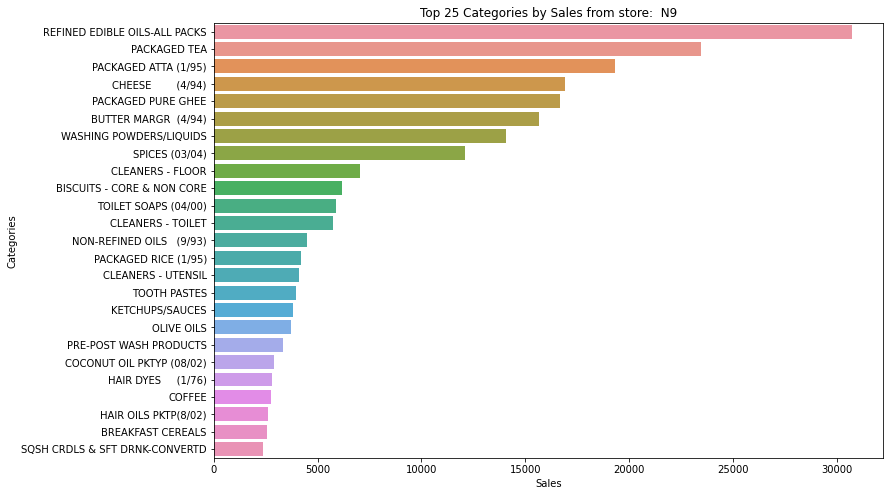

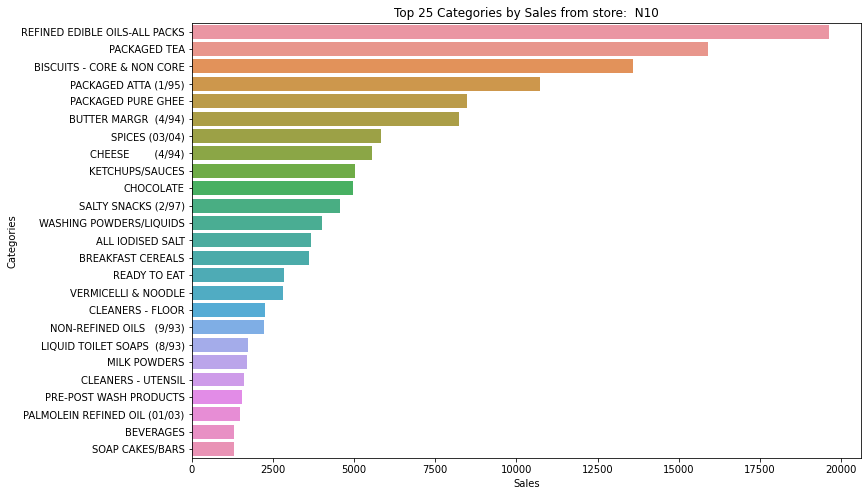

In [16]:
for i in merged_df.STORECODE.unique():
    x = merged_df.loc[df.STORECODE == i].groupby("GRP").sum().sort_values("VALUE",ascending=False)[["VALUE","QTY_x"]][0:25]
    plt.figure(figsize=(12,8))
    sns.barplot(x='VALUE',y=x.index,data=x)
    plt.title("Top 25 Categories by Sales from store:  " + i)
    plt.ylabel("Categories")
    plt.xlabel("Sales")

By looking into the different product categories, we can see that each store caters to a different clientele. This may be as a result of location or business strategy. The sales in some of the stores are dominated by cleaning products, others by pantry products, and some by snacks or a an even combination of all of them.

Similarly, we will analyze the number of units sold by category at each store and determine if they are congruent with sales.

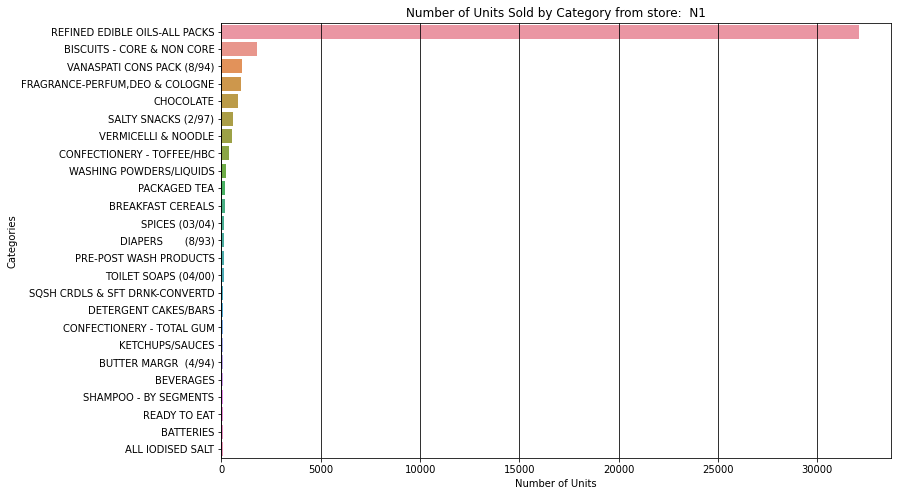

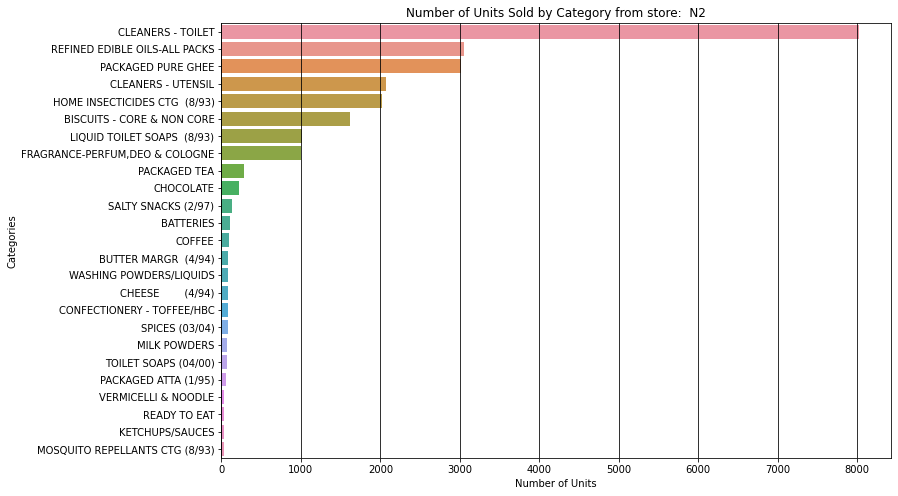

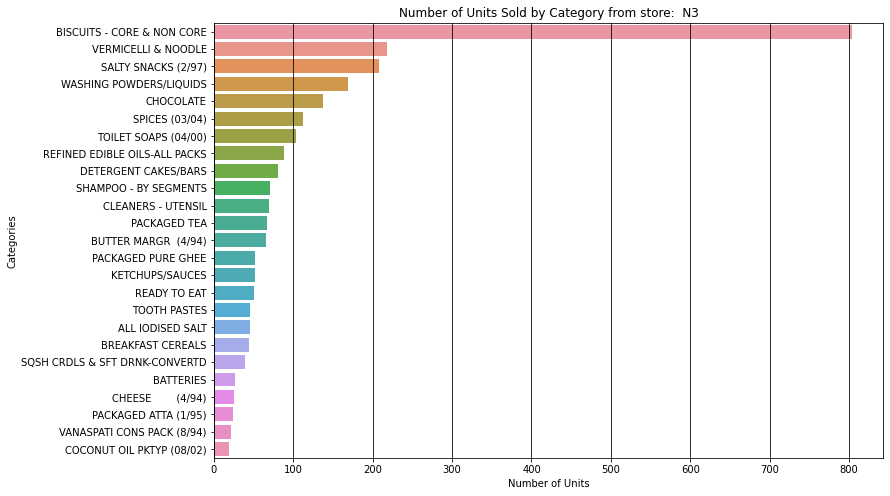

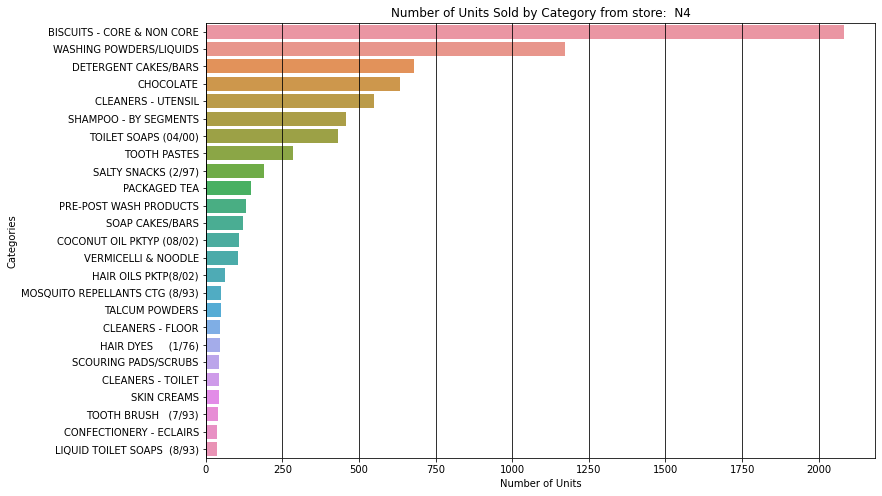

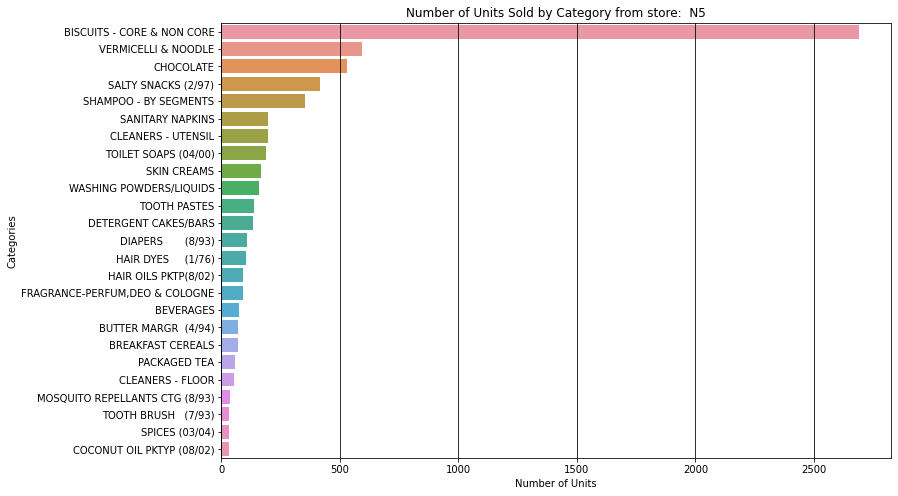

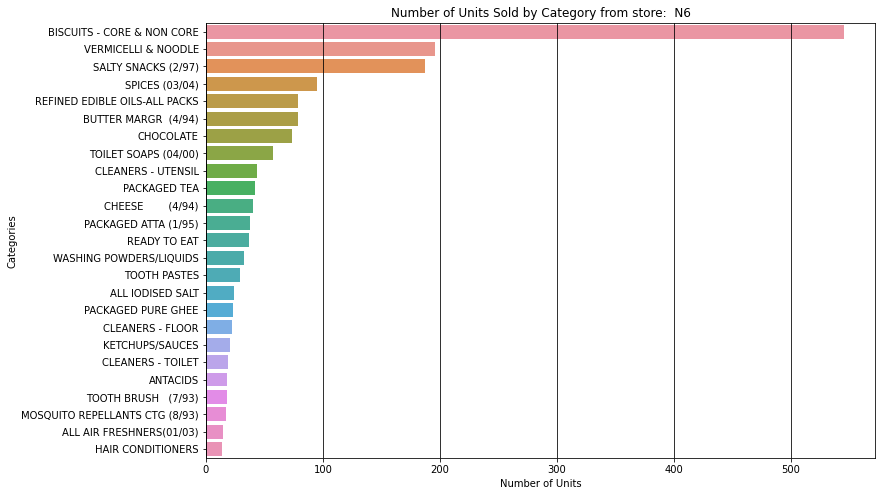

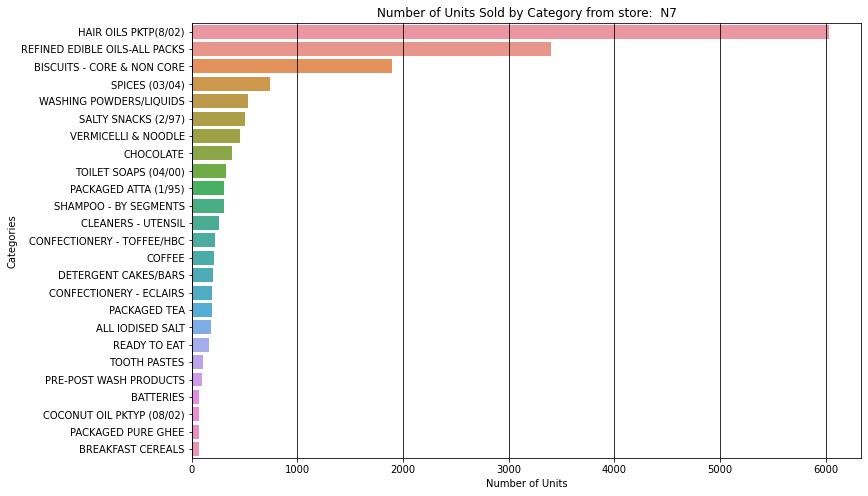

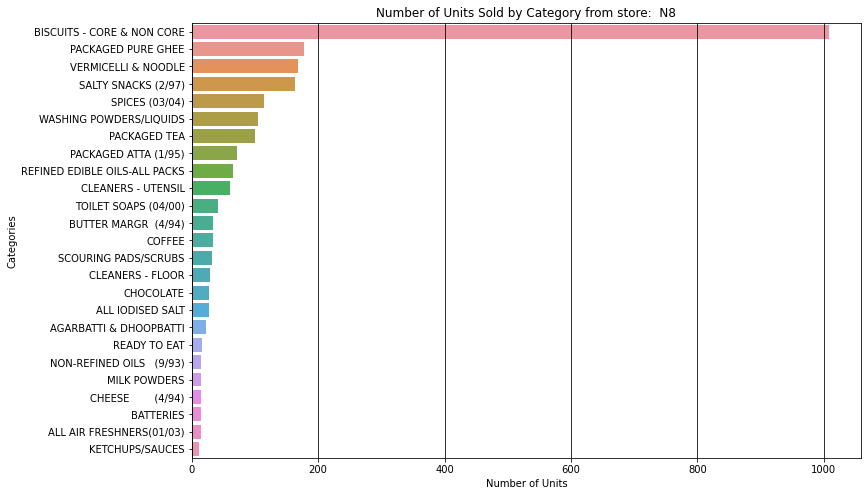

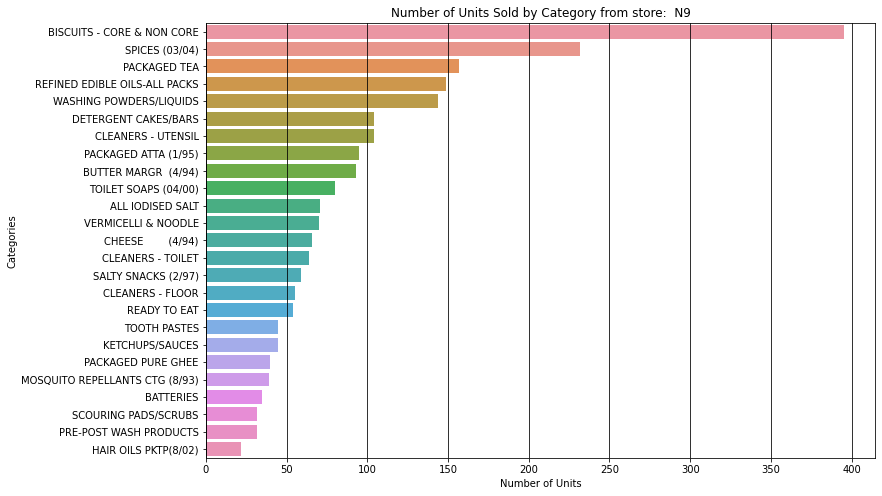

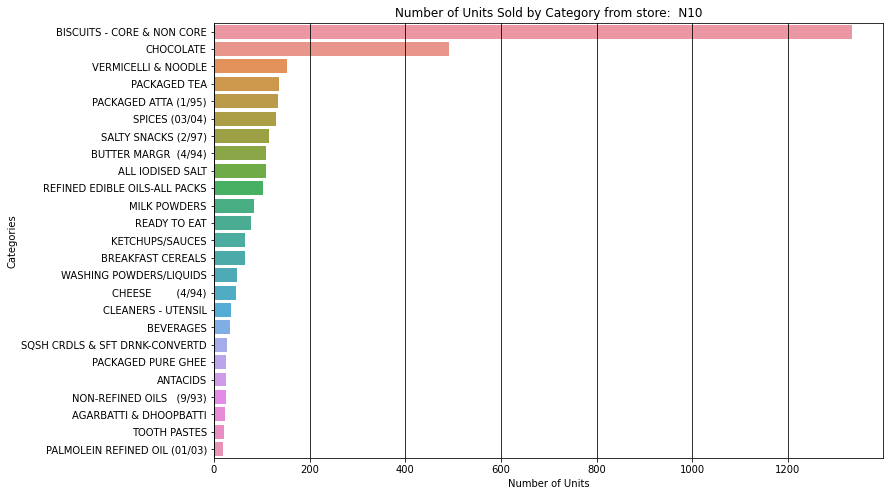

In [17]:
for i in merged_df.STORECODE.unique():
    x = merged_df.loc[df.STORECODE == i].groupby("GRP").sum().sort_values("QTY_x",ascending=False)[["VALUE","QTY_x"]][0:25]
    plt.figure(figsize=(12,8))
    sns.barplot(x='QTY_x',y=x.index,data=x)
    plt.title("Number of Units Sold by Category from store:  " + i)
    plt.xlabel("Number of Units")
    plt.ylabel("Categories")
    plt.grid(axis='x',color='black')

It would be helpful to determine what are the most and least expensive categories as that would help us better understand the results from the sales and units analysis at each store. 

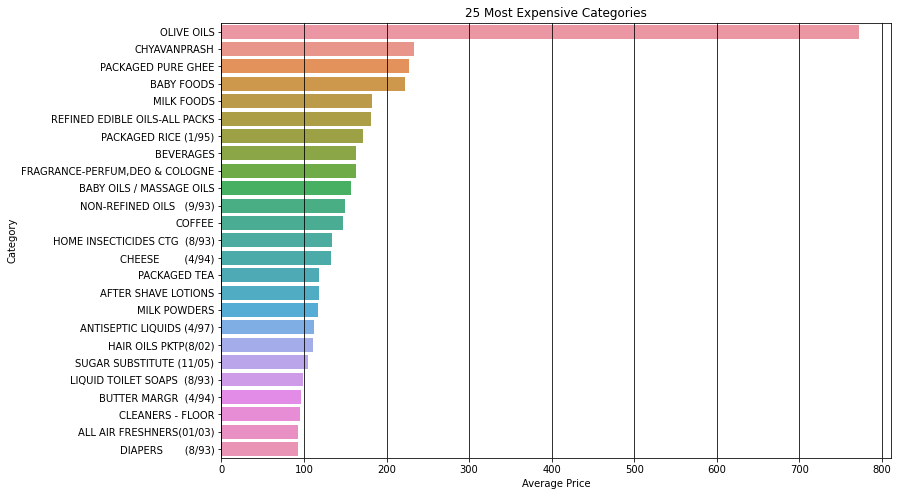

In [18]:
grp_per_price = merged_df.groupby("GRP").mean().sort_values("PRICE", ascending=False)[["PRICE","QTY_x"]][0:25]
plt.figure(figsize=(12,8))
sns.barplot(x='PRICE',y=grp_per_price.index,data=grp_per_price)
plt.title("25 Most Expensive Categories")
plt.ylabel("Category")
plt.xlabel("Average Price")
plt.grid(axis='x',color='black')

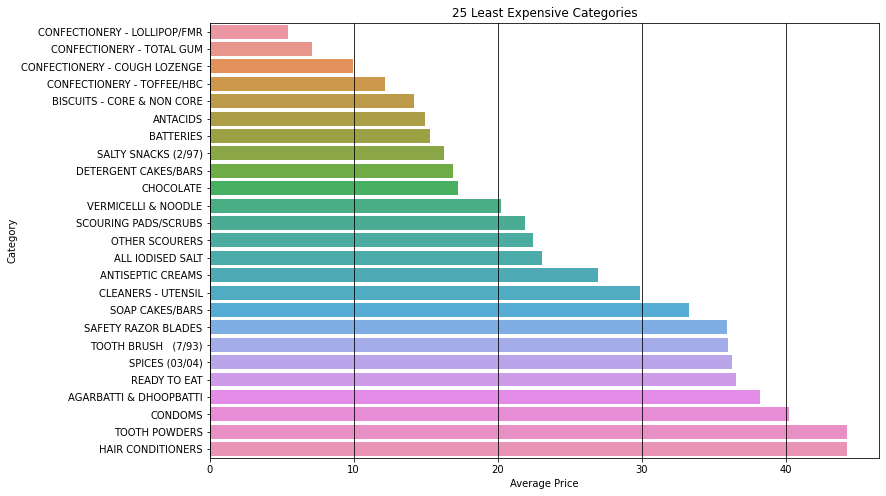

In [19]:
grp_per_price_2 = merged_df.groupby("GRP").mean().sort_values("PRICE", ascending=True)[["PRICE","QTY_x"]][0:25]
plt.figure(figsize=(12,8))
sns.barplot(x='PRICE',y=grp_per_price_2.index,data=grp_per_price_2)
plt.title("25 Least Expensive Categories")
plt.ylabel("Category")
plt.xlabel("Average Price")
plt.grid(axis='x',color='black')

The two previous graphs help us make more accurate sales analysis. Some of the conclusions we can draw are:

1. Sales at stores 1 and 5 are largely dominated by snacks (Biscuits)
2. Sales at stores 3, 6, and 7 are mostly dominated bt pantry products (Edible oils)
3. Sales at store 2 are dominated by packaged tea and coffee. 
4. The rest of the stores do not have a dominant category but instead two, three, or more of them

This may help explain why stores 4, 6, 8, and 9 have higher average sales since their sales do not rely solely on lower priced categories such as snacks (as is the case for stores 1, 2, and 5) but also in higher priced items such as cleaning products and specialty pantry products. knowing this can help each store create new business strategies or reinforce their current ones. This is particularly critical for those stores whose sales are largely dominated by a single ctegory or two in order to diversify their sales.  

In addition let's try to find out which are the best performing brands

## Which Brands sell more by dollars and by units?

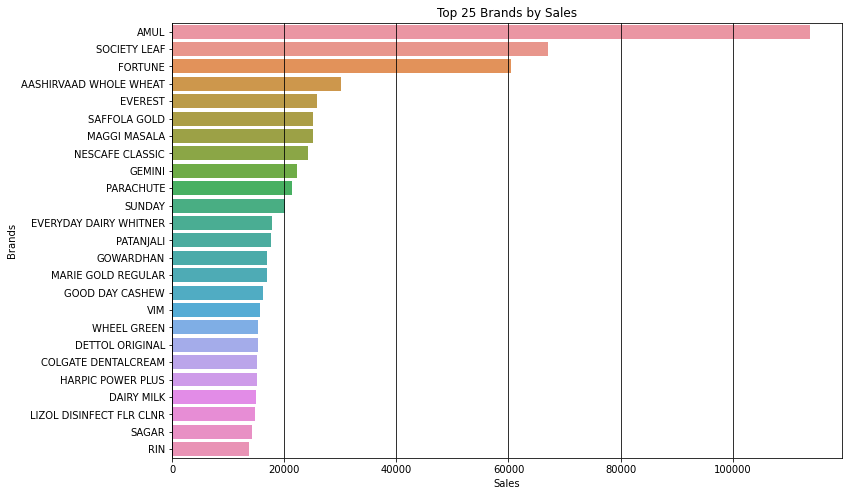

In [20]:
brands_v = merged_df.groupby('BRD').sum().sort_values('VALUE',ascending=False)[['VALUE','QTY_x']][0:25]
plt.figure(figsize=(12,8))
sns.barplot(x='VALUE',y=brands_v.index,data=brands_v)
plt.title("Top 25 Brands by Sales")
plt.xlabel("Sales")
plt.ylabel("Brands")
plt.grid(axis='x',color='black')

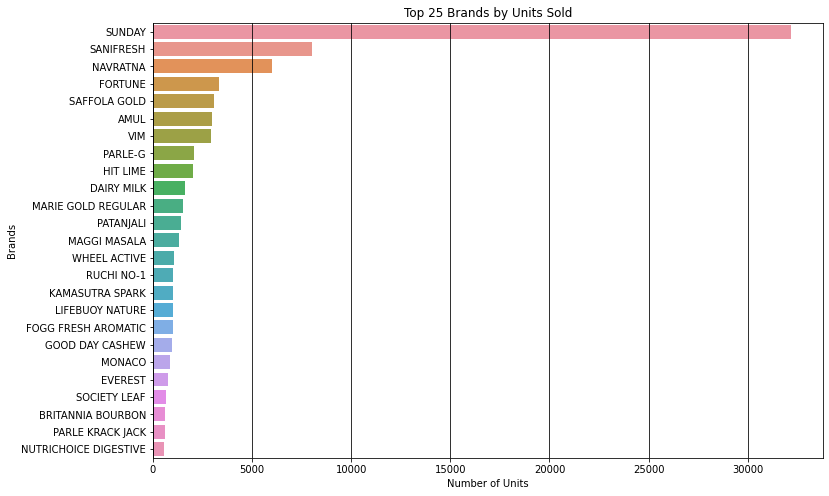

In [21]:
brands_q = merged_df.groupby('BRD').sum().sort_values('QTY_x',ascending=False)[['VALUE','QTY_x']][0:25]
plt.figure(figsize=(12,8))
sns.barplot(x='QTY_x',y=brands_q.index,data=brands_q)
plt.title("Top 25 Brands by Units Sold")
plt.xlabel("Number of Units")
plt.ylabel("Brands")
plt.grid(axis='x',color='black')

## Brand analysis by store

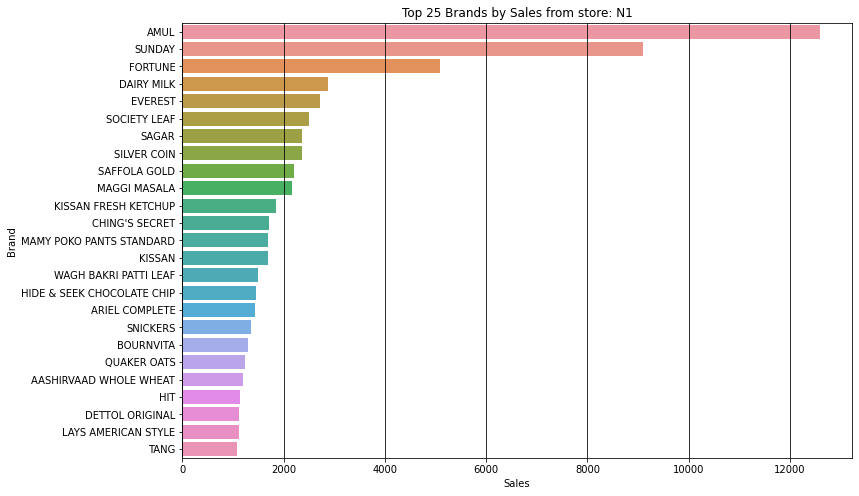

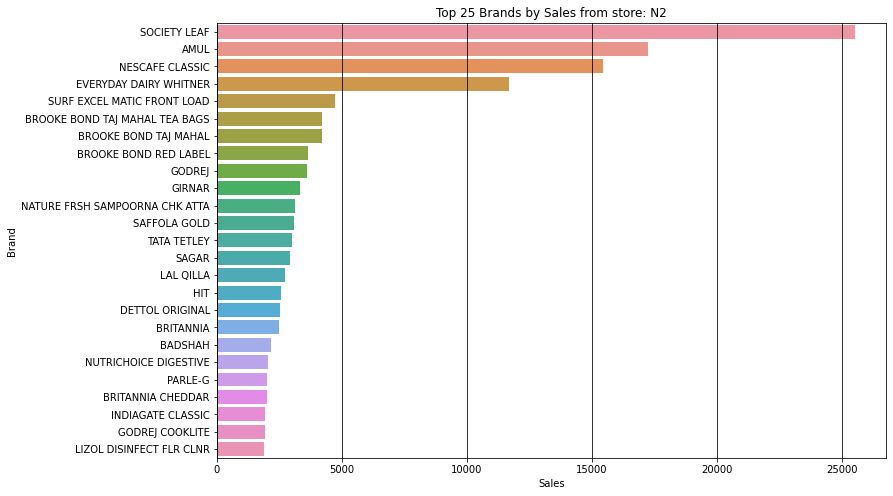

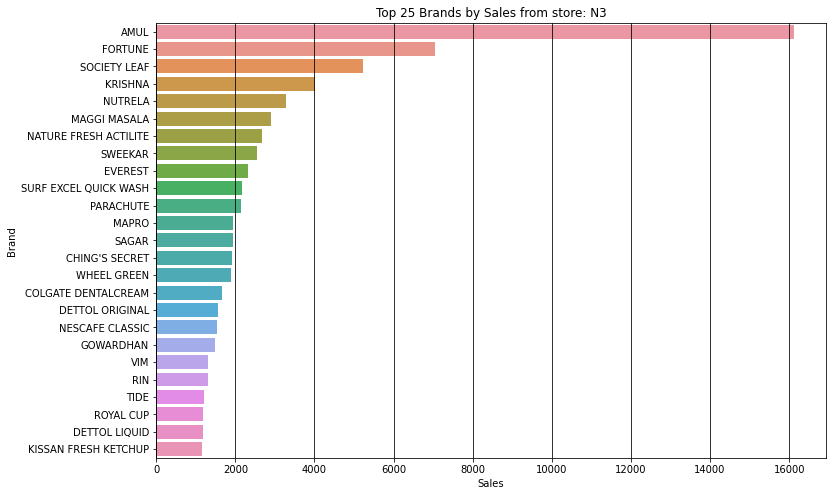

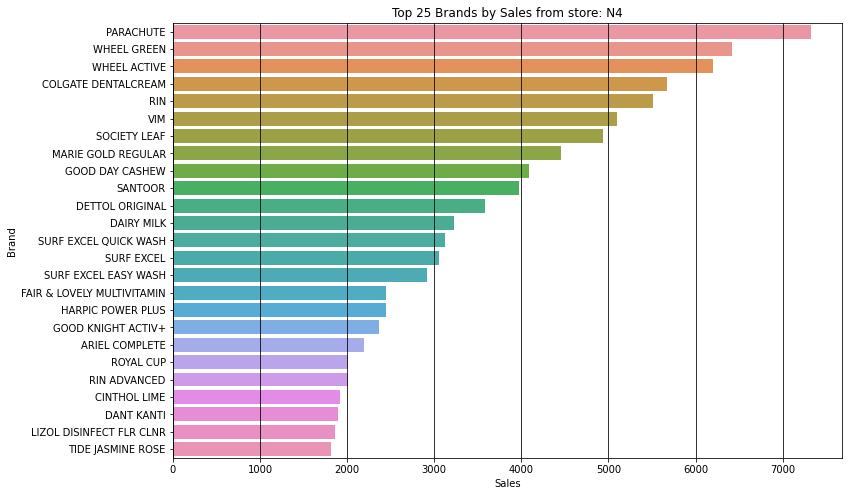

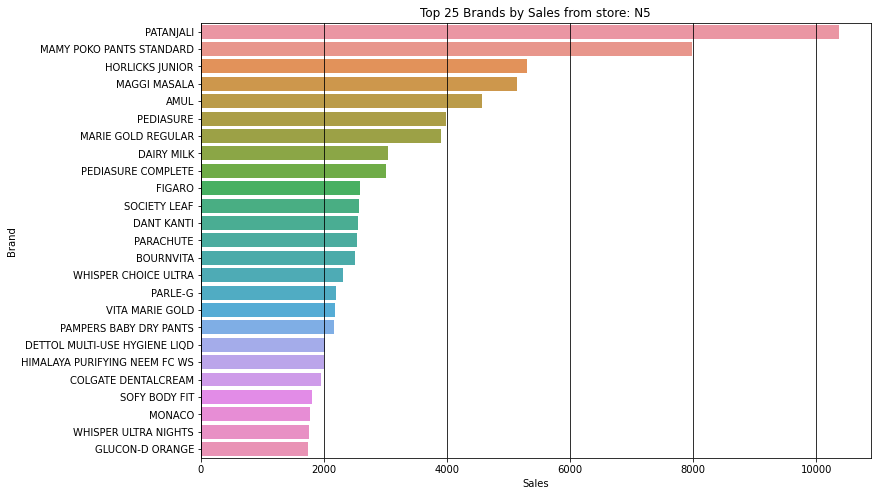

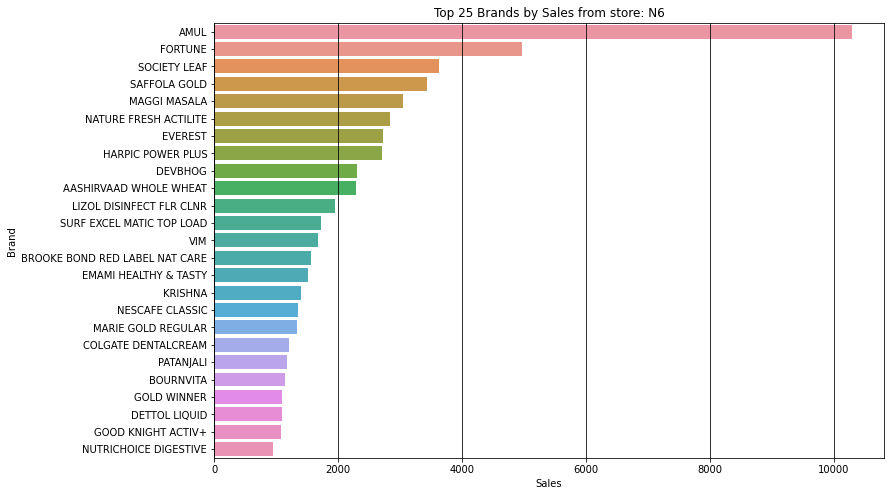

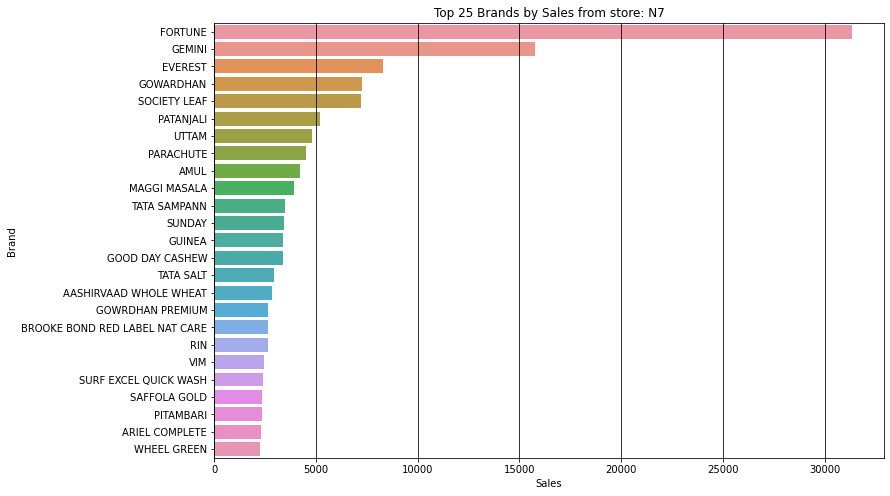

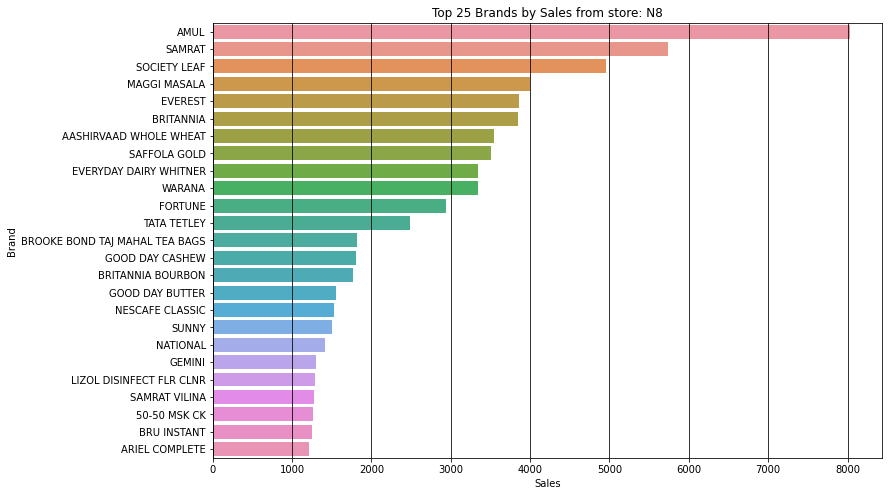

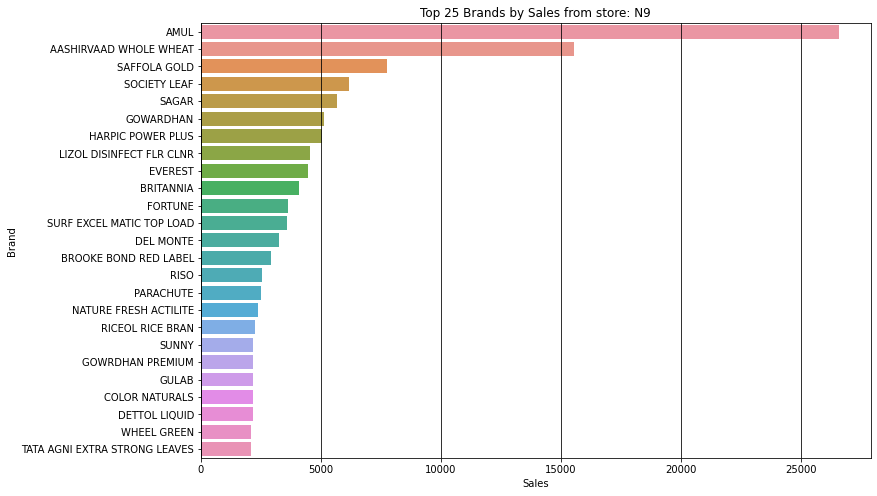

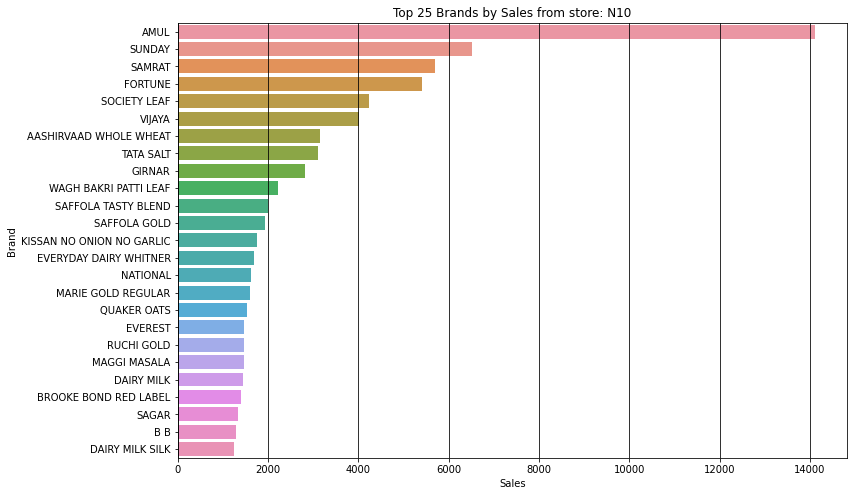

In [22]:
for i in merged_df.STORECODE.unique():
    brd_st = merged_df.loc[merged_df.STORECODE == i]
    brd = brd_st.groupby('BRD').sum().sort_values('VALUE',ascending=False)[['VALUE','QTY_x']][0:25]
    plt.figure(figsize=(12,8))
    sns.barplot(x='VALUE',y=brd.index,data=brd)
    plt.title("Top 25 Brands by Sales from store: " + i)
    plt.xlabel("Sales")
    plt.ylabel("Brand")
    plt.grid(axis='x',color='black')

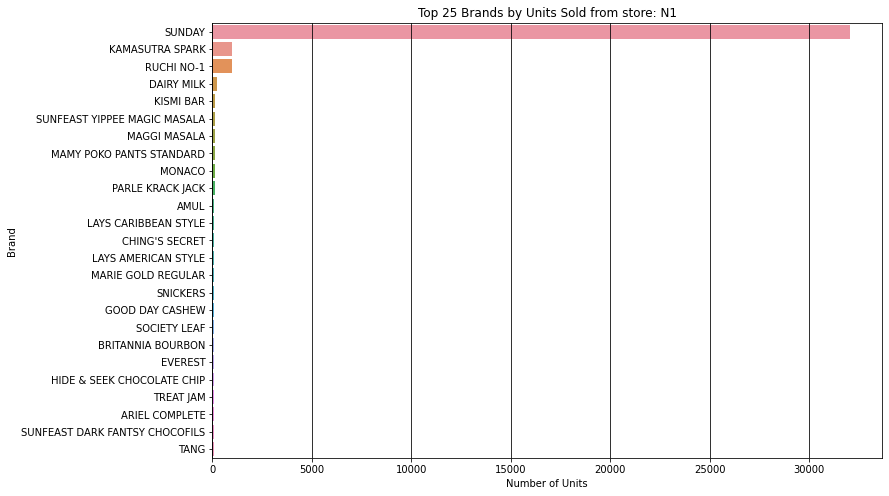

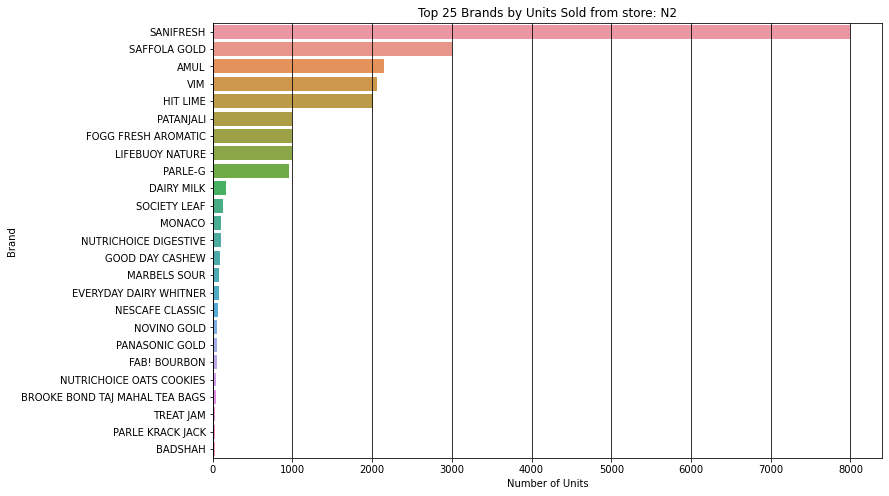

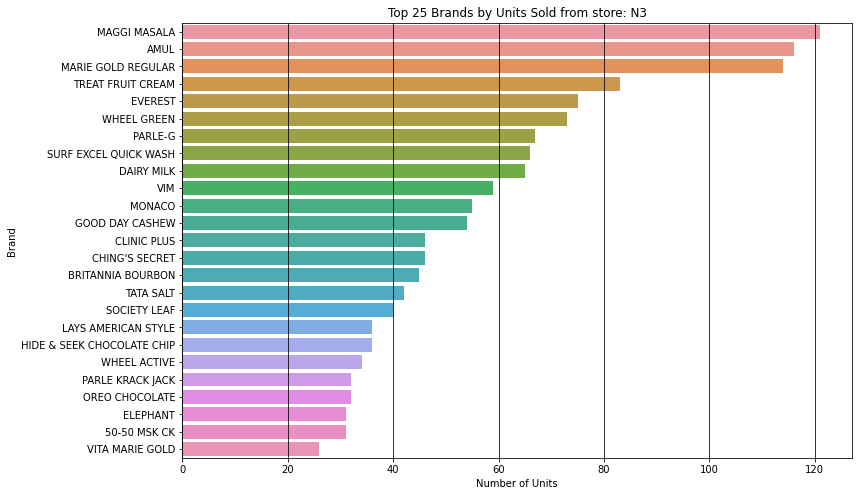

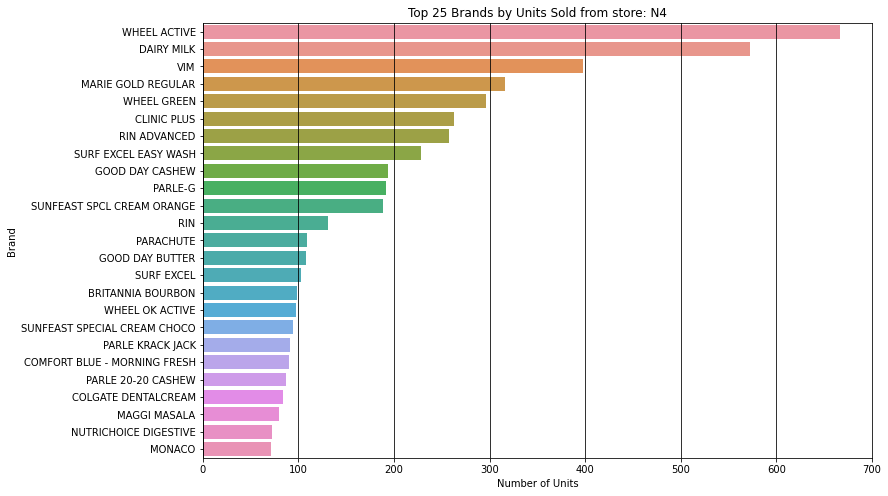

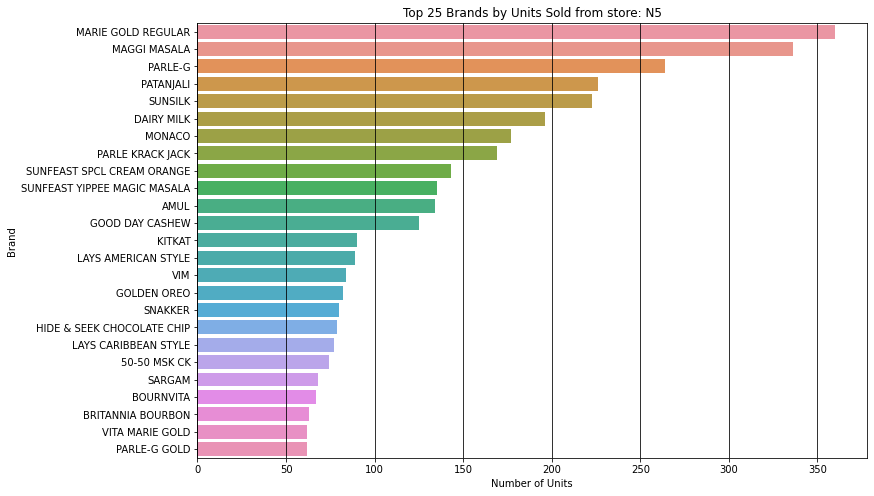

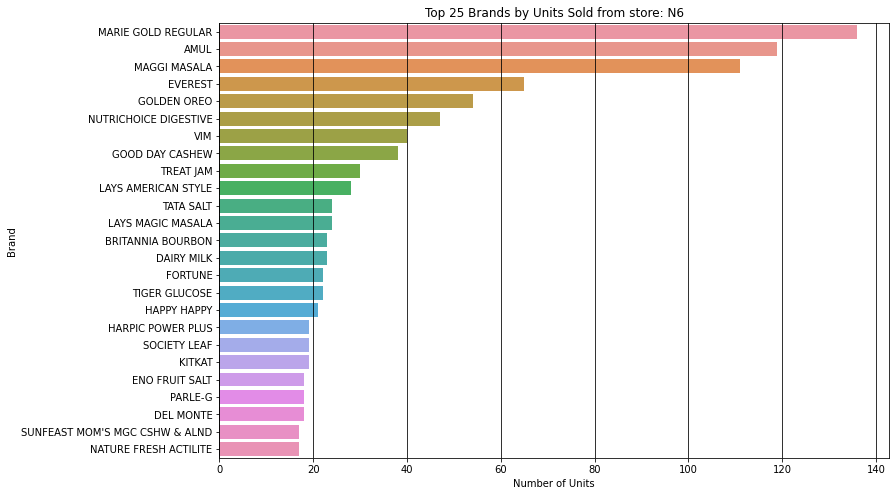

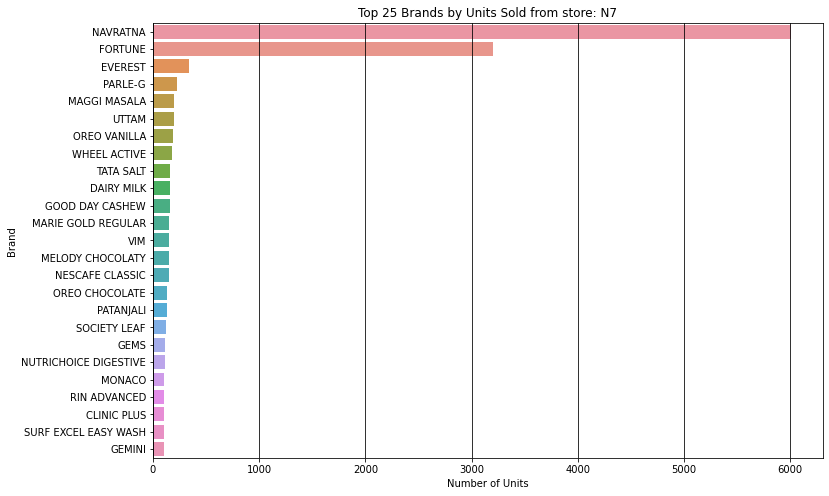

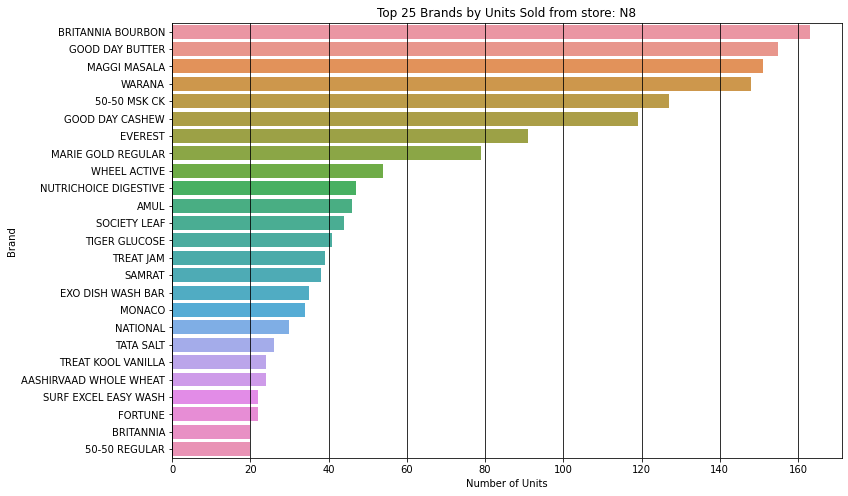

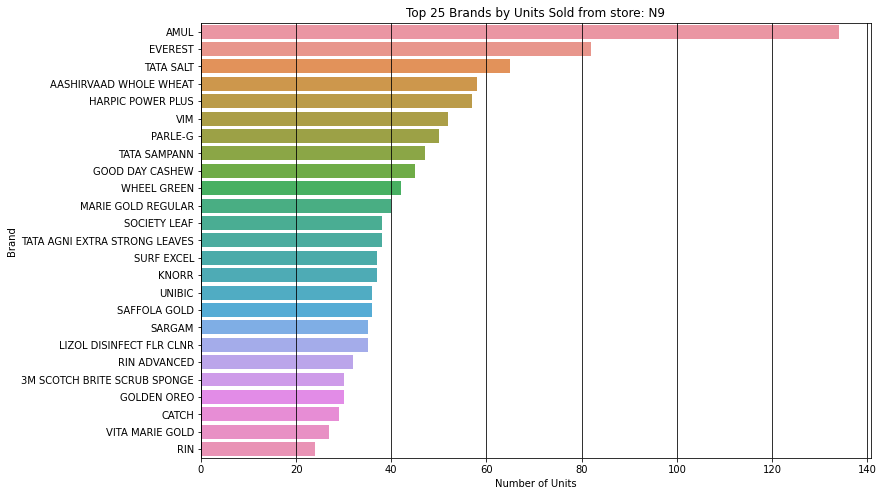

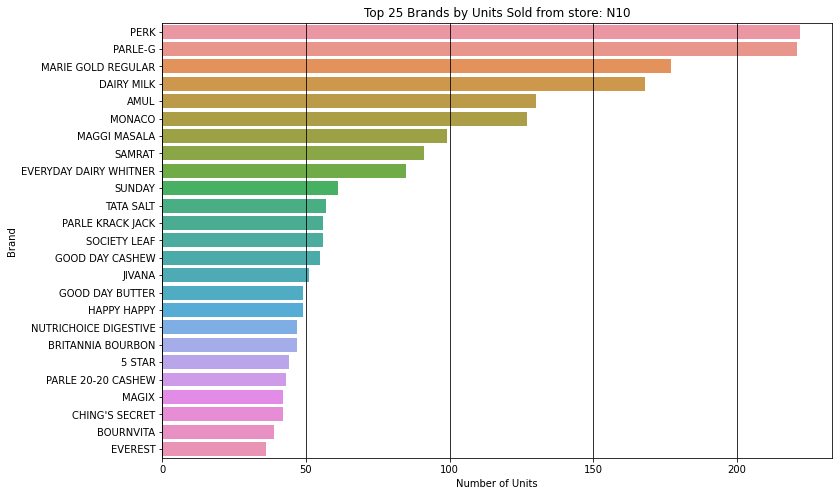

In [23]:
for i in merged_df.STORECODE.unique():
    brd_st = merged_df.loc[merged_df.STORECODE == i]
    brd = brd_st.groupby('BRD').sum().sort_values('QTY_x',ascending=False)[['VALUE','QTY_x']][0:25]
    plt.figure(figsize=(12,8))
    sns.barplot(x='QTY_x',y=brd.index,data=brd)
    plt.title("Top 25 Brands by Units Sold from store: " + i)
    plt.xlabel("Number of Units")
    plt.ylabel("Brand")
    plt.grid(axis='x',color='black')

## Which Store Sells More Units?

It may also be helpful to analyze the physical volume that each store handles in order to understand their size as this could be significant while designing a strategy. 

In [24]:
store_qty = merged_df.groupby("UNIQUE_ID").sum()[['QTY_x','PRICE']]
store_qty['STORE'] = store_qty.index.str.split('_').str[0]
store_qty

,QTY_x,PRICE,STORE
UNIQUE_ID,,,
N10_T1038,1.0,34.0,N10
N10_T1039,1.0,46.0,N10
N10_T1040,1.0,86.0,N10
N10_T1043,1.0,20.0,N10
N10_T1048,2.0,180.0,N10
...,...,...,...
N9_T940,1.0,200.0,N9
N9_T95,1.0,56.0,N9
N9_T953,28.0,885.0,N9


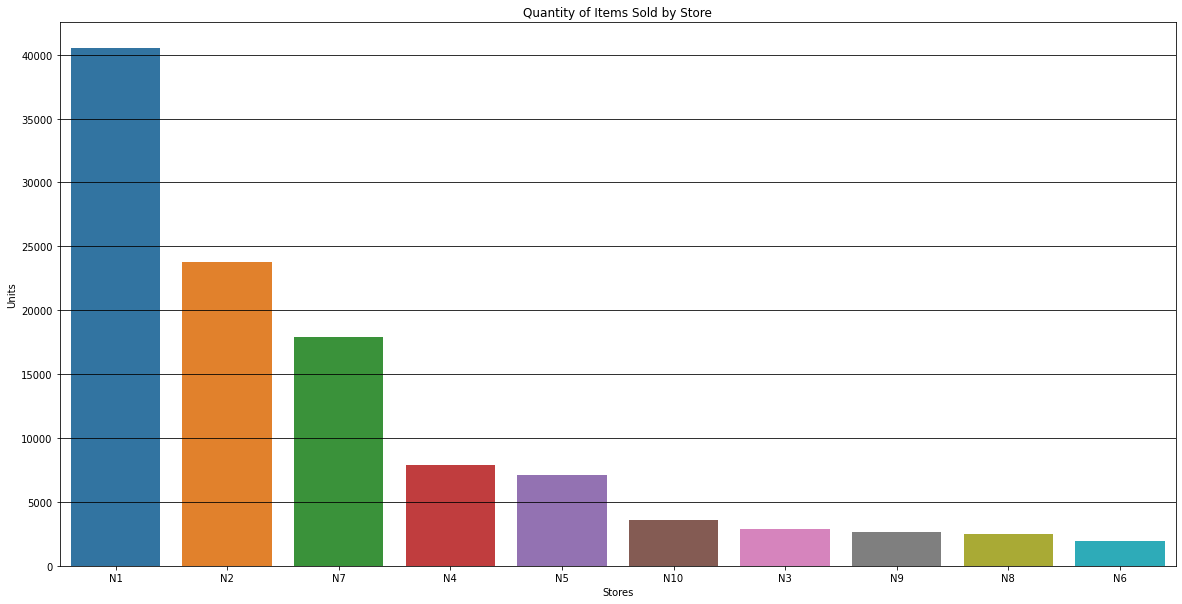

In [25]:
units_by_store = store_qty.groupby("STORE").sum().sort_values('QTY_x',ascending=False)
plt.figure(figsize=(20,10))
sns.barplot(x=units_by_store.index,y=units_by_store["QTY_x"],data=units_by_store)
plt.title("Quantity of Items Sold by Store")
plt.xlabel("Stores")
plt.ylabel("Units")
plt.grid(axis='y',color='black');

This graph shows that store 1 handles five times more volume than most stores. However, as our sales by unit analysis has shown us, store 1's sales by unit is relies largeluy in the sales of biscuits. Therefore, despite handling a seemingly large volume, store 1 may not necessarily be the bigger one. 

The second biggest store bby units sold is store 2 whose total sales are dominated by packaged tea and coffee. However, their sales by unit mostly rely on pantry products and cleaning products. we can then deduce than it is very likely that store number 2 is indeed a physically larger store.


In terms of store 7 (third largest by volume), most of its sales rely in pantry products and personal care products. This store is also the one with the highest sales during the three months analyzed. 

Stores 4 and 5 have very diversified sales. However, their sales by units have biscuits as a very large component which may help explain why they handle almost twice the unit volume than stores 10, 3, 9, 8 and 6.

In [26]:
str_brd = df.groupby("STORECODE")["BRD"].nunique().sort_values(ascending=False)
str_brd

STORECODE
N5     572
N7     496
N1     447
N4     357
N9     347
N3     326
N2     313
N6     284
N10    272
N8     261
Name: BRD, dtype: int64

# Sales by Month

Lastly, let's analyze the sales by each month.

In [27]:
month_info = merged_df[["MONTH","UNIQUE_ID"]]
month_info

,MONTH,UNIQUE_ID
0,M1,N1_T375
1,M1,N1_T379
2,M1,N1_T381
3,M1,N1_T382
4,M1,N1_T384
...,...,...
26980,M3,N10_T5999
26981,M3,N10_T6007
26982,M3,N10_T6007
26983,M3,N10_T6007


In [28]:
monthly_sales = pd.merge(month_info,unique_sales,on="UNIQUE_ID")
monthly_sales

,MONTH,UNIQUE_ID,DAY_y,BILL_AMT_y,STORE
0,M1,N1_T375,4,225.0,N1
1,M1,N1_T379,4,95.0,N1
2,M1,N1_T381,4,10.0,N1
3,M1,N1_T382,4,108.0,N1
4,M1,N1_T384,4,19.0,N1
...,...,...,...,...,...
26980,M3,N10_T5999,31,10.0,N10
26981,M3,N10_T6007,31,88.0,N10
26982,M3,N10_T6007,31,88.0,N10
26983,M3,N10_T6007,31,88.0,N10


In [29]:
monthly_sales['N_MONTH'] = monthly_sales['MONTH'].apply(lambda x: x[1])
monthly_sales

,MONTH,UNIQUE_ID,DAY_y,BILL_AMT_y,STORE,N_MONTH
0,M1,N1_T375,4,225.0,N1,1
1,M1,N1_T379,4,95.0,N1,1
2,M1,N1_T381,4,10.0,N1,1
3,M1,N1_T382,4,108.0,N1,1
4,M1,N1_T384,4,19.0,N1,1
...,...,...,...,...,...,...
26980,M3,N10_T5999,31,10.0,N10,3
26981,M3,N10_T6007,31,88.0,N10,3
26982,M3,N10_T6007,31,88.0,N10,3
26983,M3,N10_T6007,31,88.0,N10,3


In [30]:
monthly_sales = monthly_sales.drop('MONTH',axis=1)
monthly_sales

,UNIQUE_ID,DAY_y,BILL_AMT_y,STORE,N_MONTH
0,N1_T375,4,225.0,N1,1
1,N1_T379,4,95.0,N1,1
2,N1_T381,4,10.0,N1,1
3,N1_T382,4,108.0,N1,1
4,N1_T384,4,19.0,N1,1
...,...,...,...,...,...
26980,N10_T5999,31,10.0,N10,3
26981,N10_T6007,31,88.0,N10,3
26982,N10_T6007,31,88.0,N10,3
26983,N10_T6007,31,88.0,N10,3


In [31]:
monthly_sales['N_MONTH'] = pd.to_numeric(monthly_sales['N_MONTH'])

In [32]:
month_uq = monthly_sales.groupby('UNIQUE_ID').mean()
month_uq

,DAY_y,BILL_AMT_y,N_MONTH
UNIQUE_ID,,,
N10_T1038,5,34.0,1
N10_T1039,5,46.0,1
N10_T1040,5,86.0,1
N10_T1043,5,20.0,1
N10_T1048,5,180.0,1
...,...,...,...
N9_T940,2,200.0,3
N9_T95,7,56.0,1
N9_T953,3,1656.0,3


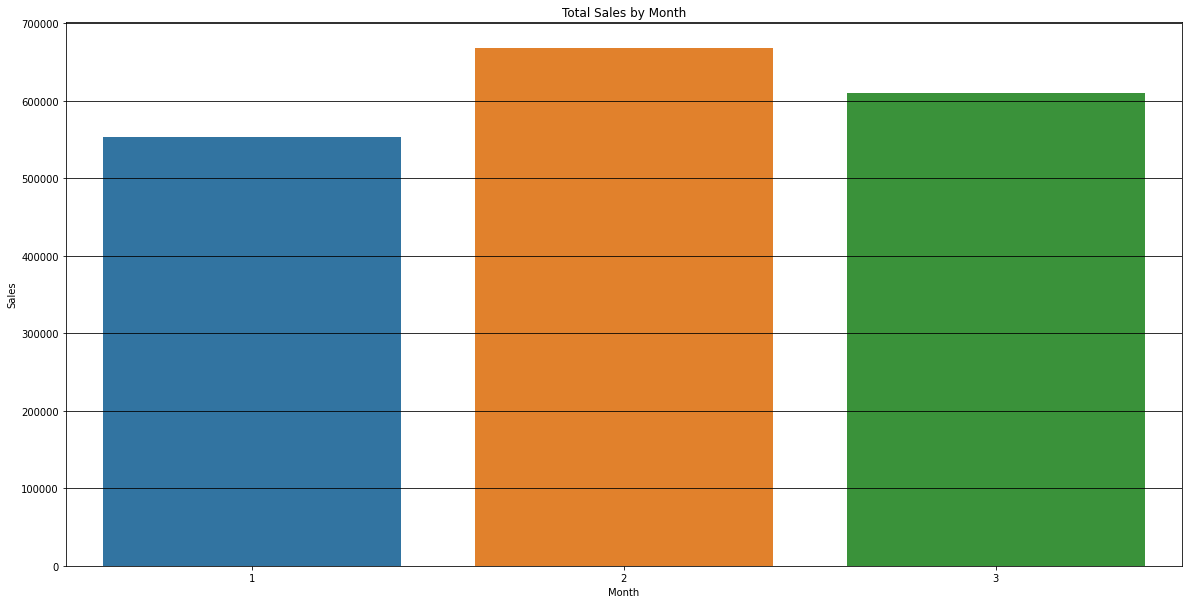

In [33]:
m_sales = month_uq.groupby('N_MONTH').sum()
plt.figure(figsize=(20,10))
sns.barplot(x=m_sales.index,y='BILL_AMT_y',data=m_sales)
plt.title("Total Sales by Month")
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(axis='y',color='black');